### Through out this code i comment some code out cause it takes to long to run, so if you wanted to run this code, I have data already stored to a csv so the code that takes long to be run doesnt need to be run.

In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
#!pip install spacy==2.1.1
#!pip install spacy textblob
!pip install matplotlib seaborn
#!pip install neuralcoref
!pip install --upgrade matplotlib networkx

     |████████████████████████████████| 12.8 MB 2.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from collections import Counter
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import spacy
from textblob import TextBlob
import json
import json
import pandas as pd
from nltk.corpus import state_union
import spacy
import pandas as pd
from textblob import TextBlob
#import neuralcoref
import networkx as nx
import matplotlib.pyplot as plt

## extracting data from JSON file

Json file download from this website

https://data.millercenter.org/

In [3]:
with open('speeches.json', 'r') as file:
    json_data = json.load(file)

# Convert JSON data to a string
json_string = json.dumps(json_data, indent=4)  # indent is optional, for pretty-printing

In [4]:
# Load JSON data
with open('speeches.json', 'r') as file:
    data = json.load(file)

# Normalize JSON data
normalized_data = pd.json_normalize(data)  # This assumes 'data' is a list of records

# Create DataFrame
df = pd.DataFrame(normalized_data)

# Sort the DataFrame by the 'date' column
df_sorted = df.sort_values(by='date')

## Adding in speeches not included like speeches done by Eisenhower and Truman

This code is taken from Nicole Semerano's project in the Presidential_NLP.ipynb file

https://github.com/nicolesemerano/Metis-Project-4-Presidential-Speeches-NLP/tree/master

In [5]:
sOu = dict() #sOu=state Of the union
#Truman's 1945 and '46 speeches had different formats that the rest
truman45 = state_union.raw('1945-Truman.txt')
truman45 = truman45.strip('PRESIDENT')
title45 = 'STATE OF THE UNION'
name_t = truman45.split('\n', 3)[0][1:16]
name45 = name_t.title()
date45 = truman45.split('\n', 3)[2][0:16]
key45 = title45 + " " + date45
speech45 = truman45.split('\n', 3)[3]
sOu[key45] = [name45] + [date45] + [speech45]
truman46 = state_union.raw('1946-Truman.txt')
truman46 = truman46.strip('PRESIDENT')
title46 = 'STATE OF THE UNION'
name_t = truman46.split('\n', 3)[0][1:16]
name46 = name_t.title()
date46 = truman46.split('\n', 3)[2][0:16]
key46 = title46 + " " + date46
speech46 = truman46.split('\n', 3)[3]
sOu[key46] = [name46] + [date46] + [speech46]
#These Truman files have the same format, so grouped together
txt_files_T = ['1947-Truman.txt', '1948-Truman.txt', 
               '1949-Truman.txt', '1950-Truman.txt', '1951-Truman.txt']
for text in txt_files_T:
    x = state_union.raw(text)
    x = x.strip('PRESIDENT')
    k = x.split('\n', 3)[0][-18:]
    name1 = x.split('\n', 3)[0][1:16]
    name = name1.title()
    date = x.split('\n', 3)[2]
    key1 = k + " " + date 
    speech = x.split('\n', 3)[3]
    sOu[key1] = [name] + [date] + [speech]
    
#These Eisenhower files have two types of formats, so grouped together
txt_files_E = ['1953-Eisenhower.txt', '1954-Eisenhower.txt', '1955-Eisenhower.txt']
for text in txt_files_E:
    x = state_union.raw(text)
    x = x.strip('PRESIDENT')
    k = x.split('\n', 3)[0][-18:]
    name1 = x.split('\n', 3)[0][1:-59]
    name = name1.title()
    date = x.split('\n', 3)[2]
    key1 = k + " " + date 
    speech = x.split('\n', 3)[3]
    sOu[key1] = [name] + [date] + [speech]

no_date = ['1956-Eisenhower.txt', '1957-Eisenhower.txt', '1958-Eisenhower.txt',
            '1959-Eisenhower.txt', '1960-Eisenhower.txt']
for text in no_date:
    x = state_union.raw(text)
    x = x.strip('PRESIDENT')
    k = x.split('\n', 2)[0][-18:]
    name1 = x.split('\n', 2)[0][1:-59]
    name = name1.title()
    date = text[:4]
    key1 = k + " " + date 
    speech = x.split('\n', 2)[2]
    sOu[key1] = [name] + [date] + [speech]
sOu.keys()

dict_keys(['STATE OF THE UNION April 16, 1945', 'STATE OF THE UNION January 21, 1946', 'STATE OF THE UNION January 6, 1947', 'STATE OF THE UNION January 7, 1948', 'STATE OF THE UNION January 5, 1949', 'STATE OF THE UNION January 4, 1950', 'STATE OF THE UNION January 8, 1951', 'STATE OF THE UNION February 2, 1953', 'STATE OF THE UNION January 7, 1954', 'STATE OF THE UNION January 6, 1955', 'STATE OF THE UNION 1956', 'STATE OF THE UNION 1957', 'STATE OF THE UNION 1958', 'STATE OF THE UNION 1959', 'STATE OF THE UNION 1960'])

In [6]:
df_dict2 = pd.DataFrame(sOu)
df50s = df_dict2.T
df50s.columns = ['President', 'Date', 'Speech']

Nicole Semerano's code stops here.

In [7]:
df50s.rename(columns={'Date': 'date'}, inplace=True)
df50s.rename(columns={'President': 'president'}, inplace=True)
df50s.rename(columns={'Speech': 'transcript'}, inplace=True)
# Rename the index
df50s.index.name = 'title'
df50s.reset_index(inplace=True)

In [8]:
df_sorted = df_sorted.reset_index(drop=True)

In [9]:
df_final = pd.concat([df_sorted, df50s], axis=0)

In [10]:
df_sorted_final = df_final.sort_values(by='date')

# Convert DataFrame to CSV
df_sorted_final.to_csv('output_filename.csv', index=False)

In [11]:
df_sorted_final['Year'] = df_sorted_final.date.str[:4]

In [12]:
df_sorted_final

doc_name             date  \
0               april-30-1789-first-inaugural-address       1789-04-30   
1            october-3-1789-thanksgiving-proclamation       1789-10-03   
2        january-8-1790-first-annual-message-congress       1790-01-08   
3      december-8-1790-second-annual-message-congress       1790-12-08   
4   december-29-1790-talk-chiefs-and-counselors-se...       1790-12-29   
..                                                ...              ...   
2                                                 NaN  January 6, 1947   
9                                                 NaN  January 6, 1955   
3                                                 NaN  January 7, 1948   
8                                                 NaN  January 7, 1954   
6                                                 NaN  January 8, 1951   

                                           transcript             president  \
0   Fellow Citizens of the Senate and the House of...     George Washington   
1   Whereas it is the duty of all Nations to ackno...     George Washington   
2   Fellow Citizens of the Senate and House of Rep...     George Washington   
3    Fellow citizens of the Senate and House of Re...     George Washington   
4    I the President of the United States, by my o...     George Washington   
..                                                ...                   ...   
2   \nMr. President, Mr. Speaker, Members of the C...       Harry S. Truman   
9   \nMr. President, Mr. Speaker, Members of the C...  Dwight D. Eisenhower   
3   \nMr. President, Mr. Speaker, and Members of t...       Harry S. Truman   
8   \nMr. President, Mr. Speaker, Members of the E...  Dwight D. Eisenhower   
6   \nMr. President, Mr. Speaker, Members Of the C...       Harry S. Truman   

                                                title  Year  
0             April 30, 1789: First Inaugural Address  1789  
1          October 3, 1789: Thanksgiving Proclamation  1789  
2   January 8, 1790: First Annual Message to Congress  1790  
3   December 8, 1790: Second Annual Message to Con...  1790  
4   December 29, 1790: Talk to the Chiefs and Coun...  1790  
..                                                ...   ...  
2                  STATE OF THE UNION January 6, 1947  Janu  
9                  STATE OF THE UNION January 6, 1955  Janu  
3                  STATE OF THE UNION January 7, 1948  Janu  
8                  STATE OF THE UNION January 7, 1954  Janu  
6                  STATE OF THE UNION January 8, 1951  Janu  

[1065 rows x 6 columns]

In [13]:
df_sorted_final.to_csv('output_filename.csv', index=False)

### SO the data collection is done now, no doing some data cleaning

In [14]:
df_sorted_final= pd.read_csv('output_filename.csv')
df_sorted_final

doc_name             date  \
0                 april-30-1789-first-inaugural-address       1789-04-30   
1              october-3-1789-thanksgiving-proclamation       1789-10-03   
2          january-8-1790-first-annual-message-congress       1790-01-08   
3        december-8-1790-second-annual-message-congress       1790-12-08   
4     december-29-1790-talk-chiefs-and-counselors-se...       1790-12-29   
...                                                 ...              ...   
1060                                                NaN  January 6, 1947   
1061                                                NaN  January 6, 1955   
1062                                                NaN  January 7, 1948   
1063                                                NaN  January 7, 1954   
1064                                                NaN  January 8, 1951   

                                             transcript             president  \
0     Fellow Citizens of the Senate and the House of...     George Washington   
1     Whereas it is the duty of all Nations to ackno...     George Washington   
2     Fellow Citizens of the Senate and House of Rep...     George Washington   
3      Fellow citizens of the Senate and House of Re...     George Washington   
4      I the President of the United States, by my o...     George Washington   
...                                                 ...                   ...   
1060  \nMr. President, Mr. Speaker, Members of the C...       Harry S. Truman   
1061  \nMr. President, Mr. Speaker, Members of the C...  Dwight D. Eisenhower   
1062  \nMr. President, Mr. Speaker, and Members of t...       Harry S. Truman   
1063  \nMr. President, Mr. Speaker, Members of the E...  Dwight D. Eisenhower   
1064  \nMr. President, Mr. Speaker, Members Of the C...       Harry S. Truman   

                                                  title  Year  
0               April 30, 1789: First Inaugural Address  1789  
1            October 3, 1789: Thanksgiving Proclamation  1789  
2     January 8, 1790: First Annual Message to Congress  1790  
3     December 8, 1790: Second Annual Message to Con...  1790  
4     December 29, 1790: Talk to the Chiefs and Coun...  1790  
...                                                 ...   ...  
1060                 STATE OF THE UNION January 6, 1947  Janu  
1061                 STATE OF THE UNION January 6, 1955  Janu  
1062                 STATE OF THE UNION January 7, 1948  Janu  
1063                 STATE OF THE UNION January 7, 1954  Janu  
1064                 STATE OF THE UNION January 8, 1951  Janu  

[1065 rows x 6 columns]

In [15]:
samp=df_sorted_final.loc[:, ['doc_name', "date", "transcript",'president','title', 'Year']]


# Assuming 'df' is your DataFrame
index_to_remove1 = samp.index[-2]  # Get the index of the second-to-last row


# Remove the second-to-last row cause this speech is alraady in the data
samp = samp.drop(index_to_remove1)
# Remove the second-to-last row
index_to_remove2 = samp.index[-3]
samp = samp.drop(index_to_remove2)
# Remove the second-to-last row
index_to_remove4 = samp.index[-7]
samp = samp.drop(index_to_remove4)
# Remove the second-to-last row
index_to_remove3 = samp.index[-7]
samp = samp.drop(index_to_remove3)

samp[-7:]
#samp.to_csv('samp_filename.csv', index=False)

doc_name              date  \
1054  february-21-2023-remarks-one-year-anniversary-...        2023-02-22   
1057                                                NaN  January 21, 1946   
1058                                                NaN   January 4, 1950   
1059                                                NaN   January 5, 1949   
1060                                                NaN   January 6, 1947   
1062                                                NaN   January 7, 1948   
1064                                                NaN   January 8, 1951   

                                             transcript        president  \
1054  THE PRESIDENT:  Hello, Poland! One of our grea...        Joe Biden   
1057  \nTo the Congress of the United States:\nA qua...  Harry S. Truman   
1058  \nMr. President, Mr. Speaker, Members of the C...  Harry S. Truman   
1059  \nMr. President, Mr. Speaker, Members of the C...  Harry S. Truman   
1060  \nMr. President, Mr. Speaker, Members of the C...  Harry S. Truman   
1062  \nMr. President, Mr. Speaker, and Members of t...  Harry S. Truman   
1064  \nMr. President, Mr. Speaker, Members Of the C...  Harry S. Truman   

                                                  title  Year  
1054  February 21, 2023: Remarks on the One-Year Ann...  2023  
1057                STATE OF THE UNION January 21, 1946  Janu  
1058                 STATE OF THE UNION January 4, 1950  Janu  
1059                 STATE OF THE UNION January 5, 1949  Janu  
1060                 STATE OF THE UNION January 6, 1947  Janu  
1062                 STATE OF THE UNION January 7, 1948  Janu  
1064                 STATE OF THE UNION January 8, 1951  Janu

In [16]:
samp.reset_index(inplace=True)

samp.drop('index', axis=1, inplace=True)

fukkk=samp[-12:]
fukkk

doc_name              date  \
1049       march-26-2022-remarks-support-people-ukraine        2022-03-26   
1050   may-24-2022-remarks-school-shooting-uvalde-texas        2022-05-25   
1051  september-1-2022-remarks-continued-battle-soul...        2022-09-02   
1052  september-21-2022-speech-77th-session-united-n...        2022-09-21   
1053                february-7-2023-state-union-address        2023-02-08   
1054  february-21-2023-remarks-one-year-anniversary-...        2023-02-22   
1055                                                NaN  January 21, 1946   
1056                                                NaN   January 4, 1950   
1057                                                NaN   January 5, 1949   
1058                                                NaN   January 6, 1947   
1059                                                NaN   January 7, 1948   
1060                                                NaN   January 8, 1951   

                                             transcript        president  \
1049  THE PRESIDENT: Thank you, thank you, thank you...        Joe Biden   
1050  Good evening, fellow Americans.\r\n\r\nI had h...        Joe Biden   
1051  THE PRESIDENT: My fellow Americans, please, if...        Joe Biden   
1052  Thank you. \r\n\r\nMr. President, Mr. Secretar...        Joe Biden   
1053  Mr. Speaker. Madam Vice President. Our First L...        Joe Biden   
1054  THE PRESIDENT:  Hello, Poland! One of our grea...        Joe Biden   
1055  \nTo the Congress of the United States:\nA qua...  Harry S. Truman   
1056  \nMr. President, Mr. Speaker, Members of the C...  Harry S. Truman   
1057  \nMr. President, Mr. Speaker, Members of the C...  Harry S. Truman   
1058  \nMr. President, Mr. Speaker, Members of the C...  Harry S. Truman   
1059  \nMr. President, Mr. Speaker, and Members of t...  Harry S. Truman   
1060  \nMr. President, Mr. Speaker, Members Of the C...  Harry S. Truman   

                                                  title  Year  
1049  March 26, 2022: Remarks in Support of the Peop...  2022  
1050  May 24, 2022: Remarks on School Shooting in Uv...  2022  
1051  September 1, 2022: Remarks on the Continued Ba...  2022  
1052  September 21, 2022: Speech before the 77th Ses...  2022  
1053       February 7, 2023: State of the Union Address  2023  
1054  February 21, 2023: Remarks on the One-Year Ann...  2023  
1055                STATE OF THE UNION January 21, 1946  Janu  
1056                 STATE OF THE UNION January 4, 1950  Janu  
1057                 STATE OF THE UNION January 5, 1949  Janu  
1058                 STATE OF THE UNION January 6, 1947  Janu  
1059                 STATE OF THE UNION January 7, 1948  Janu  
1060                 STATE OF THE UNION January 8, 1951  Janu

In [17]:
from datetime import datetime

In [18]:
for i in range(6):
    j=i+1
    um=samp.loc[(1054+j),'date']
    date_object = datetime.strptime(um, '%B %d, %Y')
    new_date_string = date_object.strftime('%Y-%m-%d')
    samp.loc[(1054+j),'date']=new_date_string
samp[-6:]

doc_name        date                                         transcript  \
1055      NaN  1946-01-21  \nTo the Congress of the United States:\nA qua...   
1056      NaN  1950-01-04  \nMr. President, Mr. Speaker, Members of the C...   
1057      NaN  1949-01-05  \nMr. President, Mr. Speaker, Members of the C...   
1058      NaN  1947-01-06  \nMr. President, Mr. Speaker, Members of the C...   
1059      NaN  1948-01-07  \nMr. President, Mr. Speaker, and Members of t...   
1060      NaN  1951-01-08  \nMr. President, Mr. Speaker, Members Of the C...   

            president                                title  Year  
1055  Harry S. Truman  STATE OF THE UNION January 21, 1946  Janu  
1056  Harry S. Truman   STATE OF THE UNION January 4, 1950  Janu  
1057  Harry S. Truman   STATE OF THE UNION January 5, 1949  Janu  
1058  Harry S. Truman   STATE OF THE UNION January 6, 1947  Janu  
1059  Harry S. Truman   STATE OF THE UNION January 7, 1948  Janu  
1060  Harry S. Truman   STATE OF THE UNION January 8, 1951  Janu

In [19]:
samp_sorted = samp.sort_values(by='date')
samp_sorted.reset_index(inplace=True)
samp_sorted['Year'] = samp_sorted.date.str[:4]
samp_sorted.drop('index', axis=1, inplace=True)
samp_sorted

doc_name        date  \
0                 april-30-1789-first-inaugural-address  1789-04-30   
1              october-3-1789-thanksgiving-proclamation  1789-10-03   
2          january-8-1790-first-annual-message-congress  1790-01-08   
3        december-8-1790-second-annual-message-congress  1790-12-08   
4     december-29-1790-talk-chiefs-and-counselors-se...  1790-12-29   
...                                                 ...         ...   
1056   may-24-2022-remarks-school-shooting-uvalde-texas  2022-05-25   
1057  september-1-2022-remarks-continued-battle-soul...  2022-09-02   
1058  september-21-2022-speech-77th-session-united-n...  2022-09-21   
1059                february-7-2023-state-union-address  2023-02-08   
1060  february-21-2023-remarks-one-year-anniversary-...  2023-02-22   

                                             transcript          president  \
0     Fellow Citizens of the Senate and the House of...  George Washington   
1     Whereas it is the duty of all Nations to ackno...  George Washington   
2     Fellow Citizens of the Senate and House of Rep...  George Washington   
3      Fellow citizens of the Senate and House of Re...  George Washington   
4      I the President of the United States, by my o...  George Washington   
...                                                 ...                ...   
1056  Good evening, fellow Americans.\r\n\r\nI had h...          Joe Biden   
1057  THE PRESIDENT: My fellow Americans, please, if...          Joe Biden   
1058  Thank you. \r\n\r\nMr. President, Mr. Secretar...          Joe Biden   
1059  Mr. Speaker. Madam Vice President. Our First L...          Joe Biden   
1060  THE PRESIDENT:  Hello, Poland! One of our grea...          Joe Biden   

                                                  title  Year  
0               April 30, 1789: First Inaugural Address  1789  
1            October 3, 1789: Thanksgiving Proclamation  1789  
2     January 8, 1790: First Annual Message to Congress  1790  
3     December 8, 1790: Second Annual Message to Con...  1790  
4     December 29, 1790: Talk to the Chiefs and Coun...  1790  
...                                                 ...   ...  
1056  May 24, 2022: Remarks on School Shooting in Uv...  2022  
1057  September 1, 2022: Remarks on the Continued Ba...  2022  
1058  September 21, 2022: Speech before the 77th Ses...  2022  
1059       February 7, 2023: State of the Union Address  2023  
1060  February 21, 2023: Remarks on the One-Year Ann...  2023  

[1061 rows x 6 columns]

In [20]:
samp_sorted.to_csv('outputfinal_filename.csv', index=False)

### SO the data collection is done now, now doing NLP PROCESSING

# Named Entity Recognition

## Data processing

In [21]:
samp_sorted= pd.read_csv('outputfinal_filename.csv')
samp_sorted

doc_name        date  \
0                 april-30-1789-first-inaugural-address  1789-04-30   
1              october-3-1789-thanksgiving-proclamation  1789-10-03   
2          january-8-1790-first-annual-message-congress  1790-01-08   
3        december-8-1790-second-annual-message-congress  1790-12-08   
4     december-29-1790-talk-chiefs-and-counselors-se...  1790-12-29   
...                                                 ...         ...   
1056   may-24-2022-remarks-school-shooting-uvalde-texas  2022-05-25   
1057  september-1-2022-remarks-continued-battle-soul...  2022-09-02   
1058  september-21-2022-speech-77th-session-united-n...  2022-09-21   
1059                february-7-2023-state-union-address  2023-02-08   
1060  february-21-2023-remarks-one-year-anniversary-...  2023-02-22   

                                             transcript          president  \
0     Fellow Citizens of the Senate and the House of...  George Washington   
1     Whereas it is the duty of all Nations to ackno...  George Washington   
2     Fellow Citizens of the Senate and House of Rep...  George Washington   
3      Fellow citizens of the Senate and House of Re...  George Washington   
4      I the President of the United States, by my o...  George Washington   
...                                                 ...                ...   
1056  Good evening, fellow Americans.\r\n\r\nI had h...          Joe Biden   
1057  THE PRESIDENT: My fellow Americans, please, if...          Joe Biden   
1058  Thank you. \r\n\r\nMr. President, Mr. Secretar...          Joe Biden   
1059  Mr. Speaker. Madam Vice President. Our First L...          Joe Biden   
1060  THE PRESIDENT:  Hello, Poland! One of our grea...          Joe Biden   

                                                  title  Year  
0               April 30, 1789: First Inaugural Address  1789  
1            October 3, 1789: Thanksgiving Proclamation  1789  
2     January 8, 1790: First Annual Message to Congress  1790  
3     December 8, 1790: Second Annual Message to Con...  1790  
4     December 29, 1790: Talk to the Chiefs and Coun...  1790  
...                                                 ...   ...  
1056  May 24, 2022: Remarks on School Shooting in Uv...  2022  
1057  September 1, 2022: Remarks on the Continued Ba...  2022  
1058  September 21, 2022: Speech before the 77th Ses...  2022  
1059       February 7, 2023: State of the Union Address  2023  
1060  February 21, 2023: Remarks on the One-Year Ann...  2023  

[1061 rows x 6 columns]

In [22]:
litz=samp_sorted.loc[:, ["Year", "transcript"]]
fr=litz["Year"].drop_duplicates()
dates=[]

for i in fr:
    dates.append(i)

## This took really long to run, but it basically looks through all the speeches and extracts the ENtites mentioned and saves them in a list

In [94]:
'''
samp_sorted= pd.read_csv('outputfinal_filename.csv')

litz=samp_sorted.loc[:, ["Year", "transcript"]]
fr=litz["Year"].drop_duplicates()
dates=[]

for i in fr:
    dates.append(i)

# Create an empty DataFrame with specified columns
woah = pd.DataFrame(columns=['year', 'entity'])


# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


# Function to extract entities
def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG', 'PERSON', 'NORP', 'FAC', 'LOC', 'PRODUCT', 'EVENT', 'WORK_OF_ART', 'LAW', 'LANGUAGE']]

# Applying the function to each speech
all_entities = []

for i in dates:
    print(i)
    cur=litz.loc[litz["Year"]== i]
    cur.reset_index(inplace=True)
    cur.drop('index', axis=1, inplace=True)
    cur_entities = []
    
    for j in range(len(cur)):
        gum= cur.loc[j,'transcript']
        entities = extract_entities(gum)
        cur_entities.extend(entities)
        all_entities.extend(entities)
        
        
    entity_counts = Counter(cur_entities)
    for entity, count in entity_counts.items():
        fum= f"{entity}: {count}"
        woah.loc[len(woah)] = [ i,  fum]
        
entity2=[]
problem=[]
county=[]
for i in range(len(woah)):
    print(i)
    if woah.loc[i, 'entity'].count(':')==1:
        ayy=woah.loc[i, 'entity'].split(":")
        entity2.append(ayy[0])
        county.append(ayy[1])
    else:
        problem.append([woah.loc[i, :], i])


for i in range(len(problem)):
    index_to_remove2 = woah.index[problem[i][1]]
    woah = woah.drop(index_to_remove2)
    
woah['entity2']=entity2
woah['county']=county


woah.reset_index(inplace=True)
woah.drop('index', axis=1, inplace=True)
woah.to_csv('entities_spec.csv', index=False)
    
    
# Create a DataFrame with a single column named "enty" for the raw list of entites
df = pd.DataFrame(all_entities, columns=['enty'])
df.to_csv('entities_raw.csv', index=False)
'''

### Saving the data for later use

In [23]:
woah = pd.read_csv('entities_spec.csv')
woah

year                           entity                       entity2  \
0      1789               Fellow Citizens: 1               Fellow Citizens   
1      1789                        Senate: 1                        Senate   
2      1789  the House of Representatives: 2  the House of Representatives   
3      1789                       Country: 2                       Country   
4      1789                           Act: 1                           Act   
...     ...                              ...                           ...   
44855  2023                    First Lady: 1                    First Lady   
44856  2023                      Russians: 1                      Russians   
44857  2023                        Allies: 2                        Allies   
44858  2023                 NATO Alliance: 1                 NATO Alliance   
44859  2023                     Article 5: 1                     Article 5   

       county  
0           1  
1           1  
2           2  
3           2  
4           1  
...       ...  
44855       1  
44856       1  
44857       2  
44858       1  
44859       1  

[44860 rows x 4 columns]

### Now counting the number of each entity have been detected

In [24]:
df = pd.read_csv("entities_raw.csv")

# Extract the "col1" column as a list of strings
all_entities = df['enty'].tolist()

In [25]:
entity_counts = Counter(all_entities)
allofem=[]
for entity, count in entity_counts.items():
        fum= f"{entity}: {count}"
        allofem.append(fum)

In [26]:
# Using most_common method
ordered_counts = entity_counts.most_common()
ents=[]
for entity, count in ordered_counts:
    print(f"{entity}: {count}")
    en= [entity,count ]
    ents.append(en)

the United States: 8285
Congress: 8163
American: 6278
America: 4351
Americans: 2724
State: 2275
States: 1998
Constitution: 1873
Government: 1583
Senate: 1572
Treasury: 1481
Washington: 1156
Europe: 1037
Mexico: 978
China: 841
Navy: 777
Army: 760
Great Britain: 679
Cuba: 618
the Soviet Union: 613
British: 603
Iraq: 590
Spain: 587
Indian: 571
France: 520
the Federal Government: 516
Indians: 506
Texas: 497
Vietnam: 473
House: 472
Russia: 467
Afghanistan: 458
Soviet: 450
Executive: 442
the House of Representatives: 434
Republican: 430
Republicans: 427
the United Nations: 407
United States: 399
Democrats: 395
Department: 387
Japan: 387
Germany: 386
The United States: 382
Asia: 380
the United States of America: 367
European: 364
the Middle East: 363
Chinese: 361
Pacific: 357
Communist: 354
Israel: 332
California: 327
Africa: 323
Territory: 323
New York: 318
Iran: 282
the White House: 280
U.S.: 277
Kennedy: 276
God: 274
Democratic: 270
Panama: 261
Medicare: 252
Atlantic: 251
Missouri: 248
NAT

In [27]:

# Create a DataFrame from the 2D list
# If you have column names, replace ['Column1', 'Column2', 'Column3'] with your column names
enn = pd.DataFrame(ents, columns=['entied', 'countied'])
enn

entied  countied
0          the United States      8285
1                   Congress      8163
2                   American      6278
3                    America      4351
4                  Americans      2724
...                      ...       ...
16093               Moldovan         1
16094                  Sandu         1
16095                Kherson         1
16096  the Orange Revolution         1
16097   the Heavenly Hundred         1

[16098 rows x 2 columns]

In [28]:
enn.reset_index(inplace=True)
enn.drop('index', axis=1, inplace=True)
enn.to_csv('entites_common.csv', index=False)

In [29]:
enn = pd.read_csv("entites_common.csv")
enn

entied  countied
0          the United States      8285
1                   Congress      8163
2                   American      6278
3                    America      4351
4                  Americans      2724
...                      ...       ...
16093               Moldovan         1
16094                  Sandu         1
16095                Kherson         1
16096  the Orange Revolution         1
16097   the Heavenly Hundred         1

[16098 rows x 2 columns]

## Bar Chart of count of first 50 most common Entites

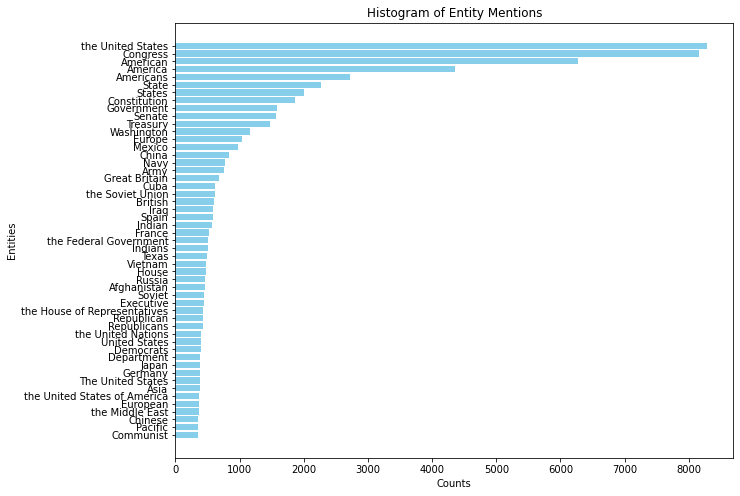

In [30]:
# Entity names and their counts (first 50), can be seen in the entites_common.csv file
entities = {
    "the United States": 8279,
    "Congress": 8159,
    "American": 6276,
    "America": 4351,
    "Americans": 2724,
    "State": 2275,
    "States": 1998,
    "Constitution": 1869,
    "Government": 1582,
    "Senate": 1569,
    "Treasury": 1481,
    "Washington": 1156,
    "Europe": 1037,
    "Mexico": 978,
    "China": 841,
    "Navy": 777,
    "Army": 760,
    "Great Britain": 679,
    "Cuba": 618,
    "the Soviet Union": 613,
    "British": 603,
    "Iraq": 590,
    "Spain": 587,
    "Indian": 568,
    "France": 520,
    "the Federal Government": 516,
    "Indians": 504,
    "Texas": 497,
    "Vietnam": 473,
    "House": 472,
    "Russia": 467,
    "Afghanistan": 458,
    "Soviet": 450,
    "Executive": 442,
    "the House of Representatives": 429,
    "Republican": 429,
    "Republicans": 427,
    "the United Nations": 407,
    "United States": 399,
    "Democrats": 395,
    "Department": 387,
    "Japan": 387,
    "Germany": 386,
    "The United States": 382,
    "Asia": 380,
    "the United States of America": 367,
    "European": 364,
    "the Middle East": 363,
    "Chinese": 361,
    "Pacific": 357,
    "Communist": 354
}

# Create lists for names and counts
names = list(entities.keys())
counts = list(entities.values())

# Create the histogram
plt.figure(figsize=(10, 8))
plt.barh(names, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Entities')
plt.title('Histogram of Entity Mentions')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

### These took really long so i saved the data so you dont have to run it

In [31]:
'''
woah = pd.read_csv('entities_spec.csv')
listofem=[]

i=0
for ent in enn['entied']:
    print(""+str(i)+'/'+str(len(enn))+"")
    i=i+1
    temp=woah.loc[woah['entity2']== ent]
    now = pd.DataFrame(columns=['year', ent])
    for date in dates:
        if date in temp['year'].values:
            ddd=temp.loc[temp["year"]== date]
            ddd.reset_index(inplace=True)
            ddd.drop('index', axis=1, inplace=True)
            now.loc[len(now)] = [ date,  int(ddd.loc[0,"county"])]
        else:
            now.loc[len(now)] = [ date,  0]
    listofem.append(now)
    
letsgo = pd.DataFrame()
letsgo

for i in range(len(listofem)):
    print(i)
    letsgo= pd.concat([letsgo, listofem[i][listofem[i].columns[1]] ], axis=1)

letsgo.reset_index(inplace=True)
letsgo.drop('index', axis=1, inplace=True)
letsgo.to_csv('entities_counted.csv', index=False)

'''

'\nwoah = pd.read_csv(\'entities_spec.csv\')\nlistofem=[]\n\ni=0\nfor ent in enn[\'entied\']:\n    print(""+str(i)+\'/\'+str(len(enn))+"")\n    i=i+1\n    temp=woah.loc[woah[\'entity2\']== ent]\n    now = pd.DataFrame(columns=[\'year\', ent])\n    for date in dates:\n        if date in temp[\'year\'].values:\n            ddd=temp.loc[temp["year"]== date]\n            ddd.reset_index(inplace=True)\n            ddd.drop(\'index\', axis=1, inplace=True)\n            now.loc[len(now)] = [ date,  int(ddd.loc[0,"county"])]\n        else:\n            now.loc[len(now)] = [ date,  0]\n    listofem.append(now)\n    \nletsgo = pd.DataFrame()\nletsgo\n\nfor i in range(len(listofem)):\n    print(i)\n    letsgo= pd.concat([letsgo, listofem[i][listofem[i].columns[1]] ], axis=1)\n\nletsgo.reset_index(inplace=True)\nletsgo.drop(\'index\', axis=1, inplace=True)\nletsgo.to_csv(\'entities_counted.csv\', index=False)\n\n'

In [32]:
letsgo = pd.read_csv("entities_counted.csv")
letsgo

the United States  Congress  American  America  Americans  State  States  \
0                    3         0         2        0          0      0       0   
1                   22         3         0        0          0      1       1   
2                   14         1         0        0          0      0       1   
3                    4         4         0        0          0      0       3   
4                   18         6         0        0          0      0       2   
..                 ...       ...       ...      ...        ...    ...     ...   
230                 53        26        54       47         28      0       1   
231                 80        47       212      138        123      0       1   
232                 54        25       213      177        136      3       0   
233                 46        12        60       91         45      1       0   
234                  8        11        26       39         19      0       0   

     Constitution  Government  Senate  ...  this House of Representatives  \
0               1           0       1  ...                              0   
1               1           0       3  ...                              0   
2               1           2       2  ...                              0   
3               4           1       2  ...                              0   
4               1           0       2  ...                              0   
..            ...         ...     ...  ...                            ...   
230             1           0       4  ...                              0   
231            19           0      20  ...                              0   
232             6           0      23  ...                              0   
233            11           0       4  ...                              0   
234             0           0       2  ...                              1   

     Paul Pelosi  Hello  the NATOization of Finland  the Warsaw Uprising  \
0              0      0                           0                    0   
1              0      0                           0                    0   
2              0      0                           0                    0   
3              0      0                           0                    0   
4              0      0                           0                    0   
..           ...    ...                         ...                  ...   
230            0      0                           0                    0   
231            0      0                           0                    0   
232            0      0                           0                    0   
233            0      0                           0                    0   
234            1      1                           1                    1   

     Moldovan  Sandu  Kherson  the Orange Revolution  the Heavenly Hundred  
0           0      0        0                      0                     0  
1           0      0        0                      0                     0  
2           0      0        0                      0                     0  
3           0      0        0                      0                     0  
4           0      0        0                      0                     0  
..        ...    ...      ...                    ...                   ...  
230         0      0        0                      0                     0  
231         0      0        0                      0                     0  
232         0      0        0                      0                     0  
233         0      0        0                      0                     0  
234         1      1        1                      1                     1  

[235 rows x 16098 columns]

In [33]:
# Re-creating the DataFrame with U.S. Presidents and their party affiliations
presidents_df = pd.DataFrame({
    "President": ["George Washington", "John Adams", "Thomas Jefferson", "James Madison", 
                  "James Monroe", "John Quincy Adams", "Andrew Jackson", "Martin Van Buren", 
                  "William Henry Harrison", "John Tyler", "James K. Polk", "Zachary Taylor", 
                  "Millard Fillmore", "Franklin Pierce", "James Buchanan", "Abraham Lincoln", 
                  "Andrew Johnson", "Ulysses S. Grant", "Rutherford B. Hayes", "James A. Garfield", 
                  "Chester A. Arthur", "Grover Cleveland", "Benjamin Harrison", "Grover Cleveland", 
                  "William McKinley", "Theodore Roosevelt", "William Howard Taft", "Woodrow Wilson", 
                  "Warren G. Harding", "Calvin Coolidge", "Herbert Hoover", "Franklin D. Roosevelt", 
                  "Harry S. Truman", "Dwight D. Eisenhower", "John F. Kennedy", "Lyndon B. Johnson", 
                  "Richard Nixon", "Gerald Ford", "Jimmy Carter", "Ronald Reagan", 
                  "George H. W. Bush", "Bill Clinton", "George W. Bush", "Barack Obama", 
                  "Donald Trump", "Joe Biden"],
    "Start Year": [1789, 1797, 1801, 1809, 1817, 1825, 1829, 1837, 1841, 1841, 1845, 1849, 
                   1850, 1853, 1857, 1861, 1865, 1869, 1877, 1881, 1881, 1885, 1889, 1893, 
                   1897, 1901, 1909, 1913, 1921, 1923, 1929, 1933, 1945, 1953, 1961, 1963, 
                   1969, 1974, 1977, 1981, 1989, 1993, 2001, 2009, 2017, 2021],
    "End Year": [1797, 1801, 1809, 1817, 1825, 1829, 1837, 1841, 1841, 1845, 1849, 1850, 
                 1853, 1857, 1861, 1865, 1869, 1877, 1881, 1881, 1885, 1889, 1893, 1897, 
                 1901, 1909, 1913, 1921, 1923, 1929, 1933, 1945, 1953, 1961, 1963, 1969, 
                 1974, 1977, 1981, 1989, 1993, 2001, 2009, 2017, 2021, 2025], # Assuming Biden's term ends in 2025
    "Party": ["None (Independent)", "Federalist", "Democratic-Republican", "Democratic-Republican", 
              "Democratic-Republican", "Democratic-Republican", "Democrat", "Democrat", 
              "Whig", "Whig/None (Independent)", "Democrat", "Whig", "Whig", "Democrat", 
              "Democrat", "Republican", "Democratic/National Union", "Republican", "Republican", 
              "Republican", "Republican", "Democrat", "Republican", "Democrat", "Republican", 
              "Republican", "Republican", "Democrat", "Republican", "Republican", "Republican", 
              "Democrat", "Democrat", "Republican", "Democrat", "Democrat", "Republican", 
              "Republican", "Democrat", "Republican", "Republican", "Democrat", "Republican", 
              "Democrat", "Republican", "Democrat"]
})

# Now creating the year-by-year DataFrame
yearly_data = []

# Iterate over each year from 1789 to 2023
for year in range(1789, 2024):
    # Find the president in office for that year
    president_in_office = presidents_df[(presidents_df['Start Year'] <= year) & (presidents_df['End Year'] > year)]
    if not president_in_office.empty:
        president_name = president_in_office.iloc[0]['President']
        party = president_in_office.iloc[0]['Party']
    else:
        # Continuing from where the previous code left off to complete the DataFrame creation
        president_name = None
        party = None
    yearly_data.append({"Year": year, "President": president_name, "Party": party})

# Convert the list to a DataFrame
yearly_presidents_df = pd.DataFrame(yearly_data)

# Display the first few rows to check the result
yearly_presidents_df.head()

Year          President               Party
0  1789  George Washington  None (Independent)
1  1790  George Washington  None (Independent)
2  1791  George Washington  None (Independent)
3  1792  George Washington  None (Independent)
4  1793  George Washington  None (Independent)

In [34]:
letsgo

the United States  Congress  American  America  Americans  State  States  \
0                    3         0         2        0          0      0       0   
1                   22         3         0        0          0      1       1   
2                   14         1         0        0          0      0       1   
3                    4         4         0        0          0      0       3   
4                   18         6         0        0          0      0       2   
..                 ...       ...       ...      ...        ...    ...     ...   
230                 53        26        54       47         28      0       1   
231                 80        47       212      138        123      0       1   
232                 54        25       213      177        136      3       0   
233                 46        12        60       91         45      1       0   
234                  8        11        26       39         19      0       0   

     Constitution  Government  Senate  ...  this House of Representatives  \
0               1           0       1  ...                              0   
1               1           0       3  ...                              0   
2               1           2       2  ...                              0   
3               4           1       2  ...                              0   
4               1           0       2  ...                              0   
..            ...         ...     ...  ...                            ...   
230             1           0       4  ...                              0   
231            19           0      20  ...                              0   
232             6           0      23  ...                              0   
233            11           0       4  ...                              0   
234             0           0       2  ...                              1   

     Paul Pelosi  Hello  the NATOization of Finland  the Warsaw Uprising  \
0              0      0                           0                    0   
1              0      0                           0                    0   
2              0      0                           0                    0   
3              0      0                           0                    0   
4              0      0                           0                    0   
..           ...    ...                         ...                  ...   
230            0      0                           0                    0   
231            0      0                           0                    0   
232            0      0                           0                    0   
233            0      0                           0                    0   
234            1      1                           1                    1   

     Moldovan  Sandu  Kherson  the Orange Revolution  the Heavenly Hundred  
0           0      0        0                      0                     0  
1           0      0        0                      0                     0  
2           0      0        0                      0                     0  
3           0      0        0                      0                     0  
4           0      0        0                      0                     0  
..        ...    ...      ...                    ...                   ...  
230         0      0        0                      0                     0  
231         0      0        0                      0                     0  
232         0      0        0                      0                     0  
233         0      0        0                      0                     0  
234         1      1        1                      1                     1  

[235 rows x 16098 columns]

In [35]:
# Applying the function to each year
letsgo.insert(0, '_Party_', yearly_presidents_df['Party'])
letsgo

_Party_  the United States  Congress  American  America  \
0    None (Independent)                  3         0         2        0   
1    None (Independent)                 22         3         0        0   
2    None (Independent)                 14         1         0        0   
3    None (Independent)                  4         4         0        0   
4    None (Independent)                 18         6         0        0   
..                  ...                ...       ...       ...      ...   
230          Republican                 53        26        54       47   
231          Republican                 80        47       212      138   
232            Democrat                 54        25       213      177   
233            Democrat                 46        12        60       91   
234            Democrat                  8        11        26       39   

     Americans  State  States  Constitution  Government  ...  \
0            0      0       0             1           0  ...   
1            0      1       1             1           0  ...   
2            0      0       1             1           2  ...   
3            0      0       3             4           1  ...   
4            0      0       2             1           0  ...   
..         ...    ...     ...           ...         ...  ...   
230         28      0       1             1           0  ...   
231        123      0       1            19           0  ...   
232        136      3       0             6           0  ...   
233         45      1       0            11           0  ...   
234         19      0       0             0           0  ...   

     this House of Representatives  Paul Pelosi  Hello  \
0                                0            0      0   
1                                0            0      0   
2                                0            0      0   
3                                0            0      0   
4                                0            0      0   
..                             ...          ...    ...   
230                              0            0      0   
231                              0            0      0   
232                              0            0      0   
233                              0            0      0   
234                              1            1      1   

     the NATOization of Finland  the Warsaw Uprising  Moldovan  Sandu  \
0                             0                    0         0      0   
1                             0                    0         0      0   
2                             0                    0         0      0   
3                             0                    0         0      0   
4                             0                    0         0      0   
..                          ...                  ...       ...    ...   
230                           0                    0         0      0   
231                           0                    0         0      0   
232                           0                    0         0      0   
233                           0                    0         0      0   
234                           1                    1         1      1   

     Kherson  the Orange Revolution  the Heavenly Hundred  
0          0                      0                     0  
1          0                      0                     0  
2          0                      0                     0  
3          0                      0                     0  
4          0                      0                     0  
..       ...                    ...                   ...  
230        0                      0                     0  
231        0                      0                     0  
232        0                      0                     0  
233        0                      0                     0  
234        1                      1                     1  

[235 rows x 16099 columns]

In [36]:
letsgo.insert(0, '_Year_', dates)

In [37]:
letsgo

_Year_             _Party_  the United States  Congress  American  \
0      1789  None (Independent)                  3         0         2   
1      1790  None (Independent)                 22         3         0   
2      1791  None (Independent)                 14         1         0   
3      1792  None (Independent)                  4         4         0   
4      1793  None (Independent)                 18         6         0   
..      ...                 ...                ...       ...       ...   
230    2019          Republican                 53        26        54   
231    2020          Republican                 80        47       212   
232    2021            Democrat                 54        25       213   
233    2022            Democrat                 46        12        60   
234    2023            Democrat                  8        11        26   

     America  Americans  State  States  Constitution  ...  \
0          0          0      0       0             1  ...   
1          0          0      1       1             1  ...   
2          0          0      0       1             1  ...   
3          0          0      0       3             4  ...   
4          0          0      0       2             1  ...   
..       ...        ...    ...     ...           ...  ...   
230       47         28      0       1             1  ...   
231      138        123      0       1            19  ...   
232      177        136      3       0             6  ...   
233       91         45      1       0            11  ...   
234       39         19      0       0             0  ...   

     this House of Representatives  Paul Pelosi  Hello  \
0                                0            0      0   
1                                0            0      0   
2                                0            0      0   
3                                0            0      0   
4                                0            0      0   
..                             ...          ...    ...   
230                              0            0      0   
231                              0            0      0   
232                              0            0      0   
233                              0            0      0   
234                              1            1      1   

     the NATOization of Finland  the Warsaw Uprising  Moldovan  Sandu  \
0                             0                    0         0      0   
1                             0                    0         0      0   
2                             0                    0         0      0   
3                             0                    0         0      0   
4                             0                    0         0      0   
..                          ...                  ...       ...    ...   
230                           0                    0         0      0   
231                           0                    0         0      0   
232                           0                    0         0      0   
233                           0                    0         0      0   
234                           1                    1         1      1   

     Kherson  the Orange Revolution  the Heavenly Hundred  
0          0                      0                     0  
1          0                      0                     0  
2          0                      0                     0  
3          0                      0                     0  
4          0                      0                     0  
..       ...                    ...                   ...  
230        0                      0                     0  
231        0                      0                     0  
232        0                      0                     0  
233        0                      0                     0  
234        1                      1                     1  

[235 rows x 16100 columns]

In [38]:
letsgo.to_csv('entities_counted_Partied.csv', index=False)
letsgo

_Year_             _Party_  the United States  Congress  American  \
0      1789  None (Independent)                  3         0         2   
1      1790  None (Independent)                 22         3         0   
2      1791  None (Independent)                 14         1         0   
3      1792  None (Independent)                  4         4         0   
4      1793  None (Independent)                 18         6         0   
..      ...                 ...                ...       ...       ...   
230    2019          Republican                 53        26        54   
231    2020          Republican                 80        47       212   
232    2021            Democrat                 54        25       213   
233    2022            Democrat                 46        12        60   
234    2023            Democrat                  8        11        26   

     America  Americans  State  States  Constitution  ...  \
0          0          0      0       0             1  ...   
1          0          0      1       1             1  ...   
2          0          0      0       1             1  ...   
3          0          0      0       3             4  ...   
4          0          0      0       2             1  ...   
..       ...        ...    ...     ...           ...  ...   
230       47         28      0       1             1  ...   
231      138        123      0       1            19  ...   
232      177        136      3       0             6  ...   
233       91         45      1       0            11  ...   
234       39         19      0       0             0  ...   

     this House of Representatives  Paul Pelosi  Hello  \
0                                0            0      0   
1                                0            0      0   
2                                0            0      0   
3                                0            0      0   
4                                0            0      0   
..                             ...          ...    ...   
230                              0            0      0   
231                              0            0      0   
232                              0            0      0   
233                              0            0      0   
234                              1            1      1   

     the NATOization of Finland  the Warsaw Uprising  Moldovan  Sandu  \
0                             0                    0         0      0   
1                             0                    0         0      0   
2                             0                    0         0      0   
3                             0                    0         0      0   
4                             0                    0         0      0   
..                          ...                  ...       ...    ...   
230                           0                    0         0      0   
231                           0                    0         0      0   
232                           0                    0         0      0   
233                           0                    0         0      0   
234                           1                    1         1      1   

     Kherson  the Orange Revolution  the Heavenly Hundred  
0          0                      0                     0  
1          0                      0                     0  
2          0                      0                     0  
3          0                      0                     0  
4          0                      0                     0  
..       ...                    ...                   ...  
230        0                      0                     0  
231        0                      0                     0  
232        0                      0                     0  
233        0                      0                     0  
234        1                      1                     1  

[235 rows x 16100 columns]

In [39]:
letsgo = pd.read_csv("entities_counted_Partied.csv")
letsgo

0      1789
1      1790
2      1791
3      1792
4      1793
       ... 
230    2019
231    2020
232    2021
233    2022
234    2023
Name: _Year_, Length: 235, dtype: int64

## Chart of alot of Entites, not final product, just checking (charts take time to be made)

) missing from current font./site-packages/seaborn/utils.py:95: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font./site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


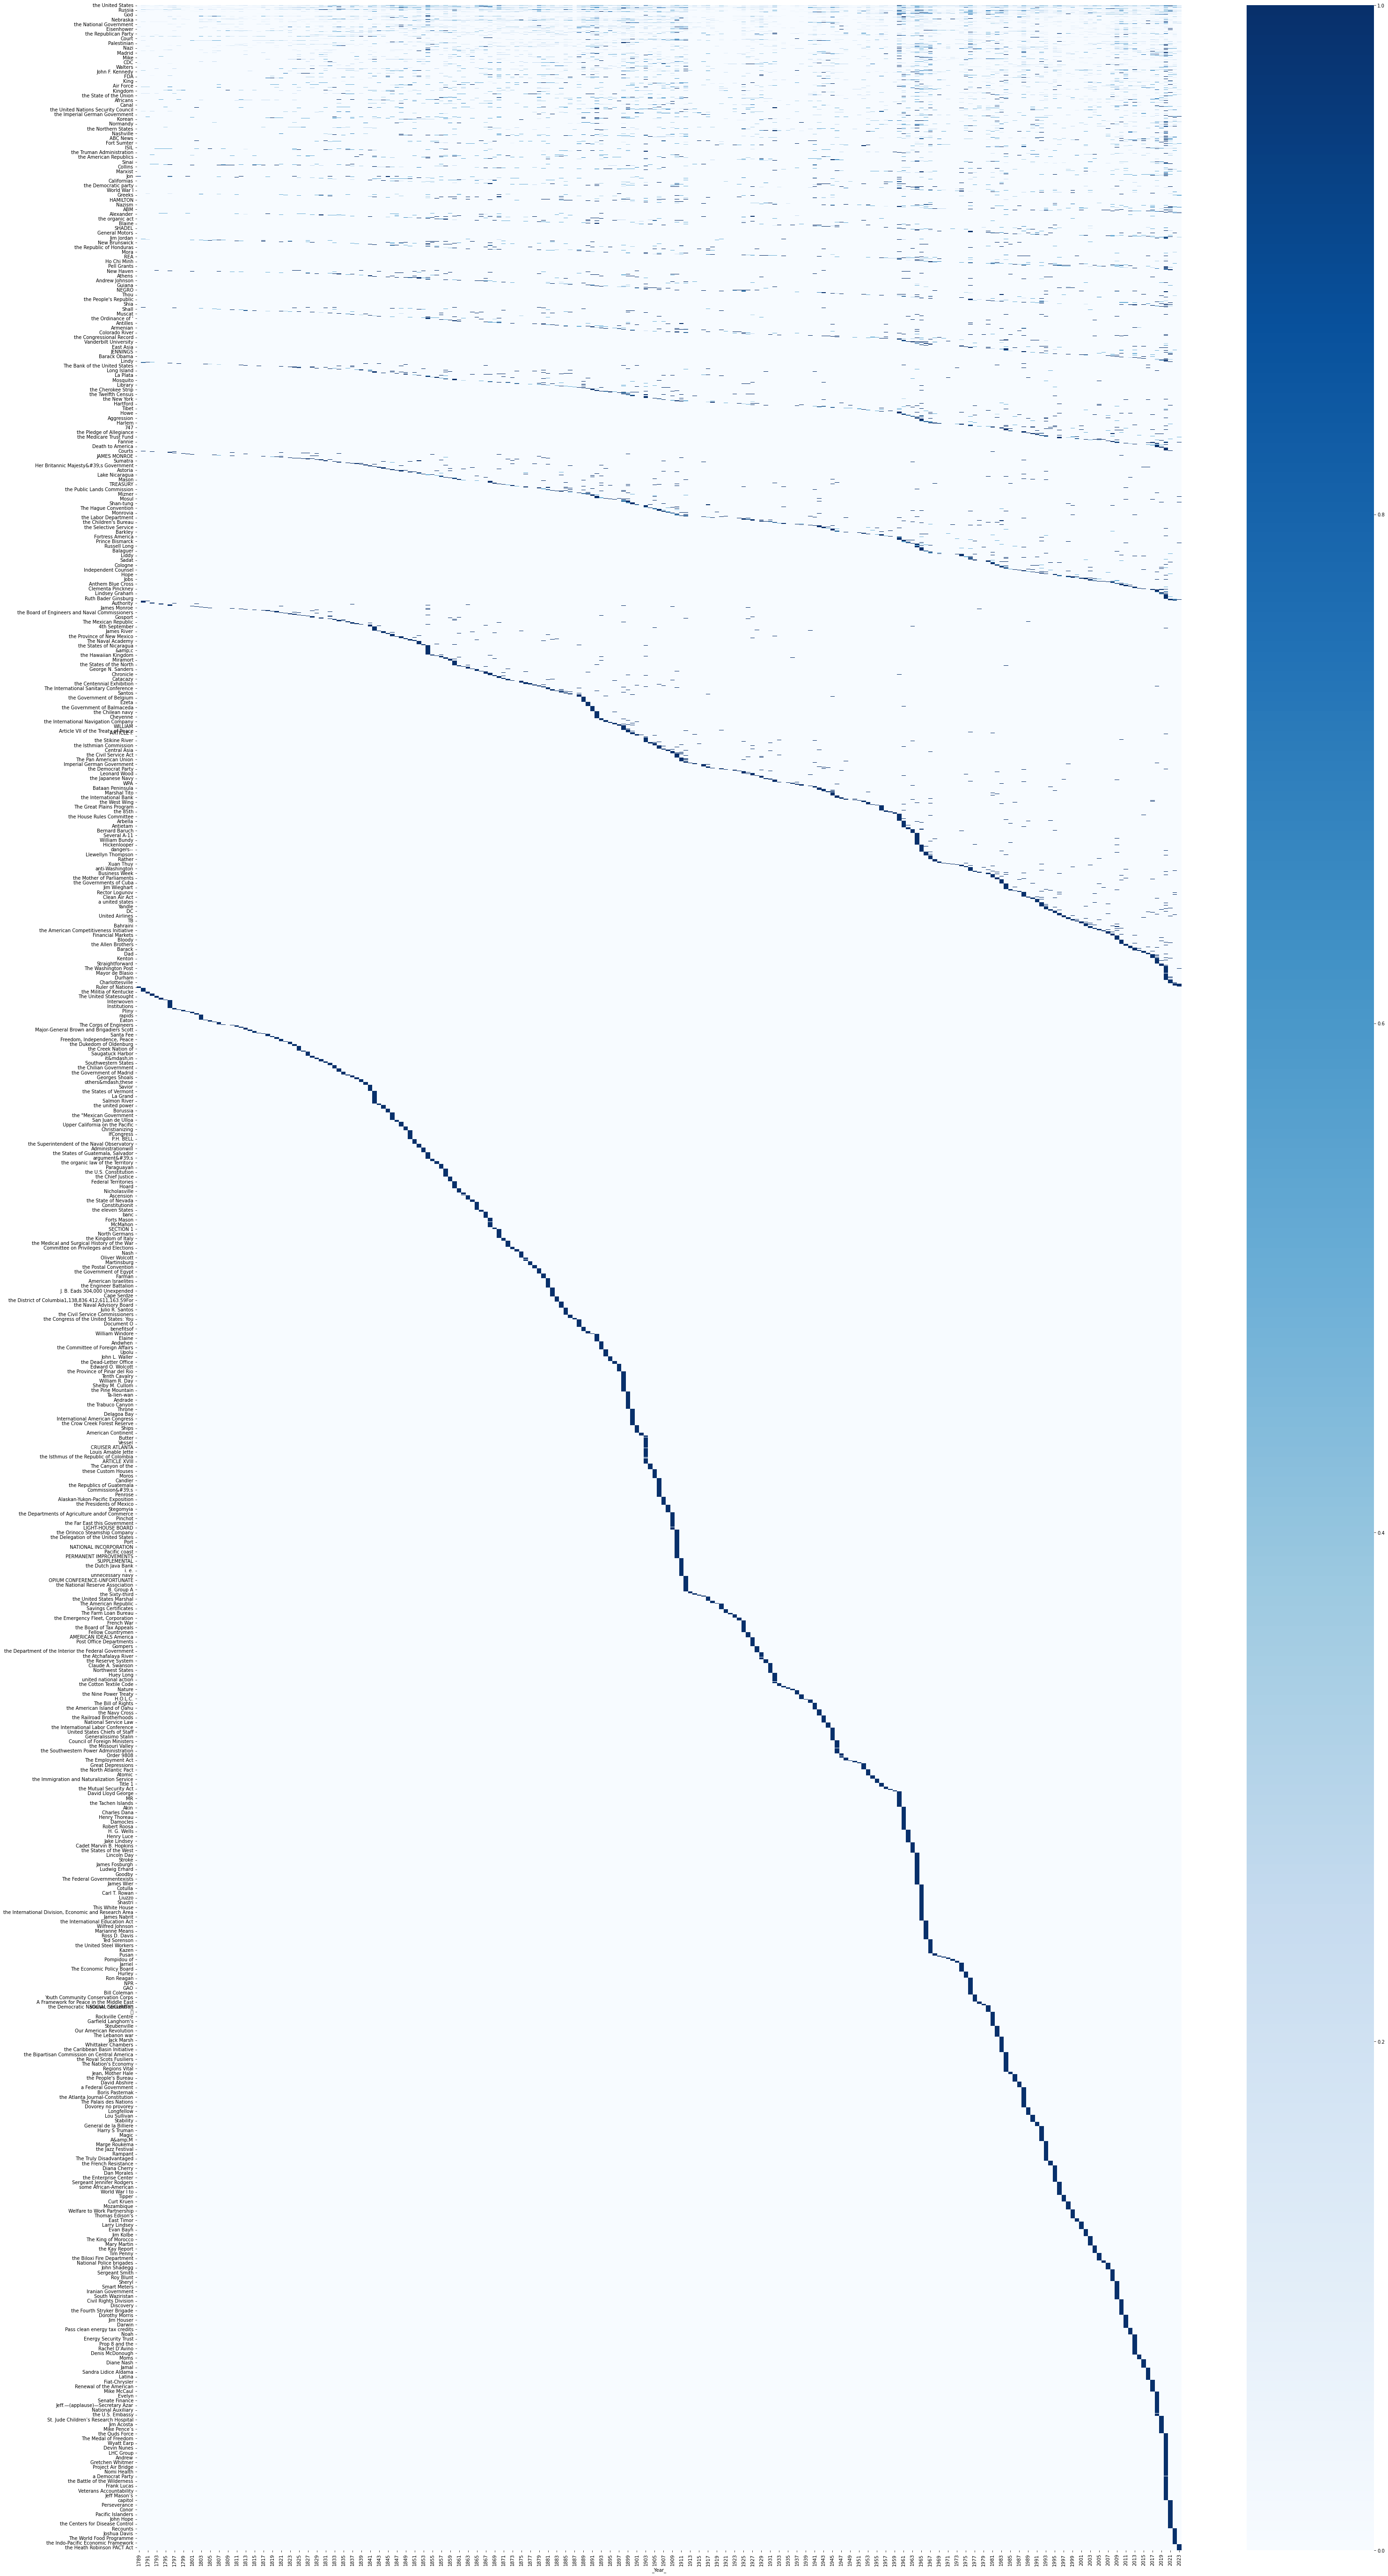

In [40]:
# Assuming df is your DataFrame

# Initialize a Min-Max Scaler
scaler = MinMaxScaler()
letgos = letsgo.drop(columns=letsgo.columns[0])
letgos = letgos.drop(columns=letgos.columns[0])

# Scale the data
letgos_scaled = pd.DataFrame(scaler.fit_transform(letgos), columns=letgos.columns, index=letsgo["_Year_"])

# Create the heatmap
plt.figure(figsize=(50, 100))
sns.heatmap(letgos_scaled.T, annot=False, cmap='Blues')
plt.show()




## Chart 1

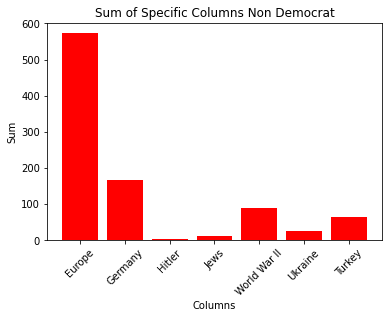

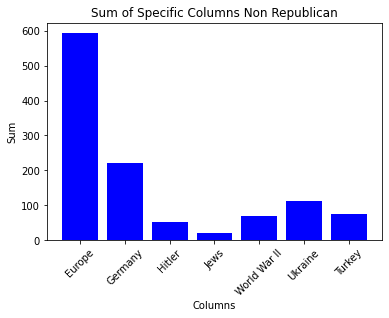

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/3127727352.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


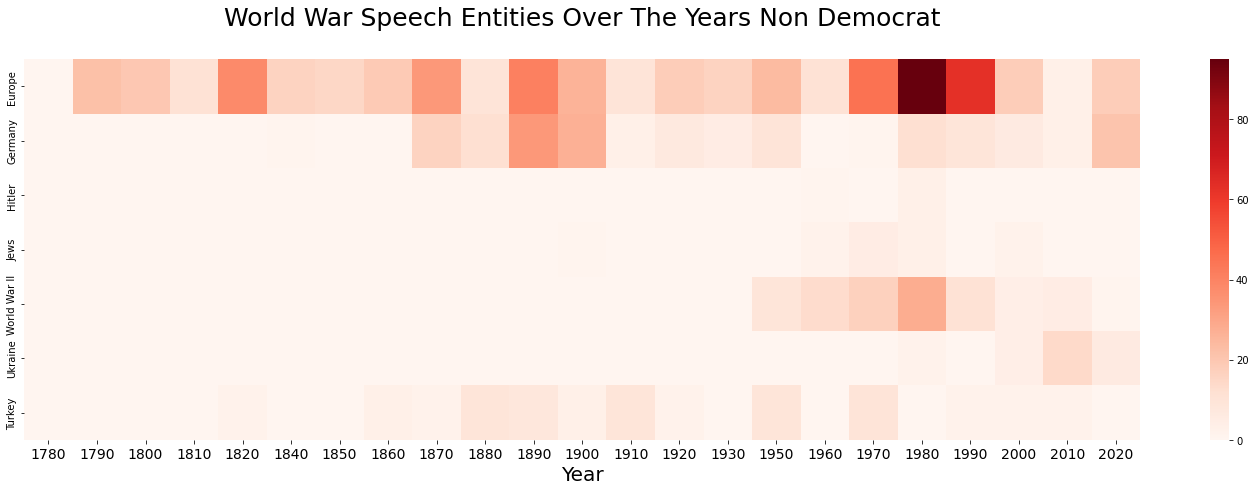

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/3127727352.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


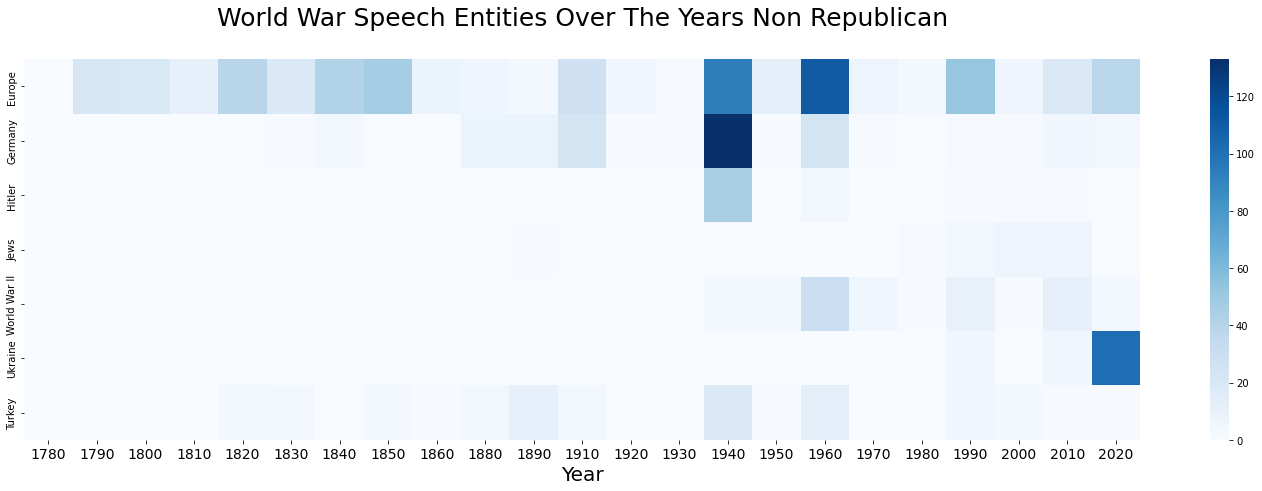

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/3127727352.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


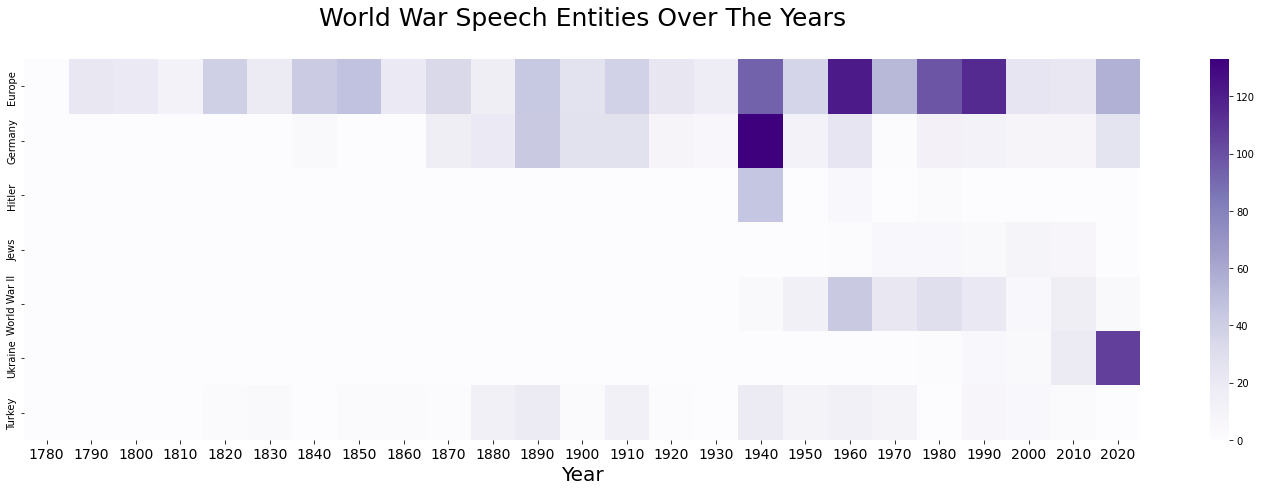

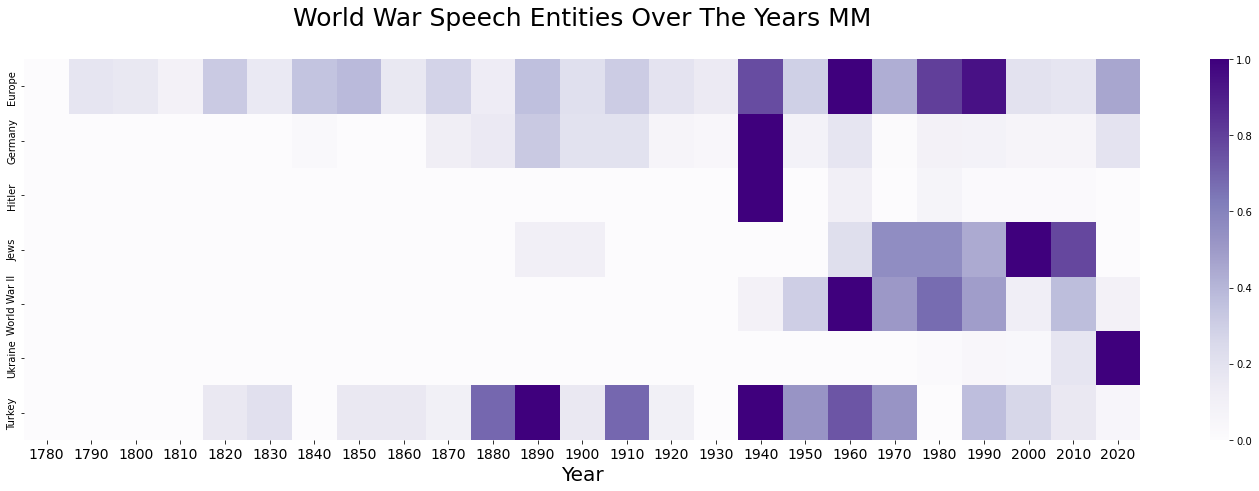

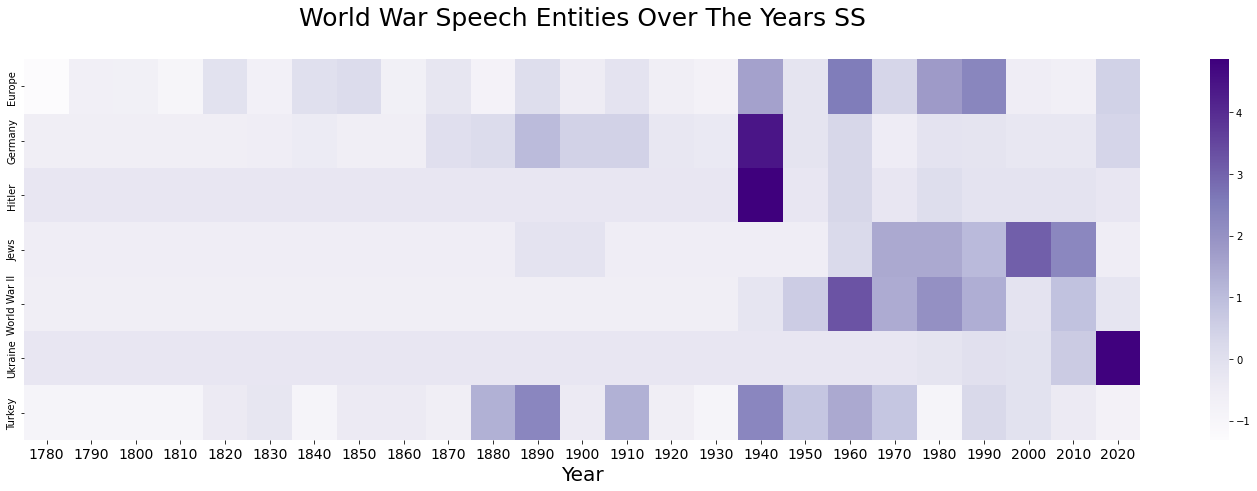

In [49]:
data = [
    "Europe: 1037", "Germany: 386", "Hitler: 56", "Jews: 34", 
    "World War II: 157", "Ukraine: 137", "Turkey: 134"
]

# Splitting each string at ':' and taking the first part
cleaned_list_Europe = [(item.split(':')[0] )for item in data]


##
##
##
non_democrat_df = letsgo[letsgo['_Party_'] != 'Democrat']
non_Republican_df = letsgo[letsgo['_Party_'] != 'Republican']

import matplotlib.pyplot as plt

# Assuming non_democrat_df is your DataFrame
subs = cleaned_list_Europe

# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_democrat_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Red')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Sum of Specific Columns Non Democrat')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_Republican_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Blue')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Sum of Specific Columns Non Republican')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()




def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

subs=non_democrat_df[cleaned_list_Europe]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Reds')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('World War Speech Entities Over The Years Non Democrat\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()






subs=non_Republican_df[cleaned_list_Europe]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Blues')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('World War Speech Entities Over The Years Non Republican\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

##
##
##


subs=letsgo[cleaned_list_Europe]
def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


# Group by interval and sum
result_df = subs.groupby('Interval').sum()

result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)



# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Purples')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('World War Speech Entities Over The Years\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

# Assuming df is your DataFrame



# Initialize a Min-Max Scaler
scaler = MinMaxScaler()

# Scale the data
subs_scaled = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25,7))
sns.heatmap(subs_scaled.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('World War Speech Entities Over The Years MM\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()



# Initialize a Standard Scaler
scaler = StandardScaler()

# Scale the data
letsgo_standardized = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(letsgo_standardized.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('World War Speech Entities Over The Years SS\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

## chart 2

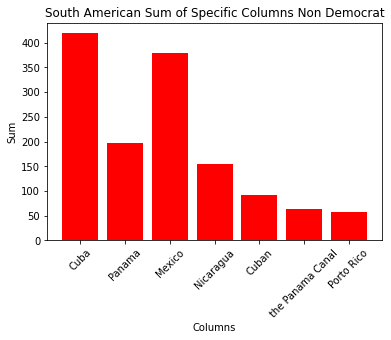

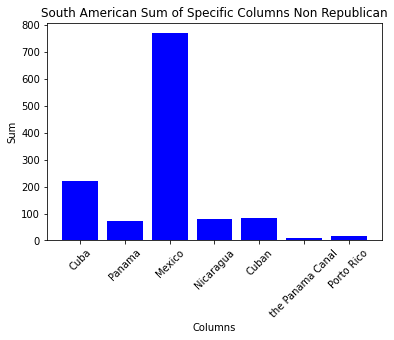

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/2722386813.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


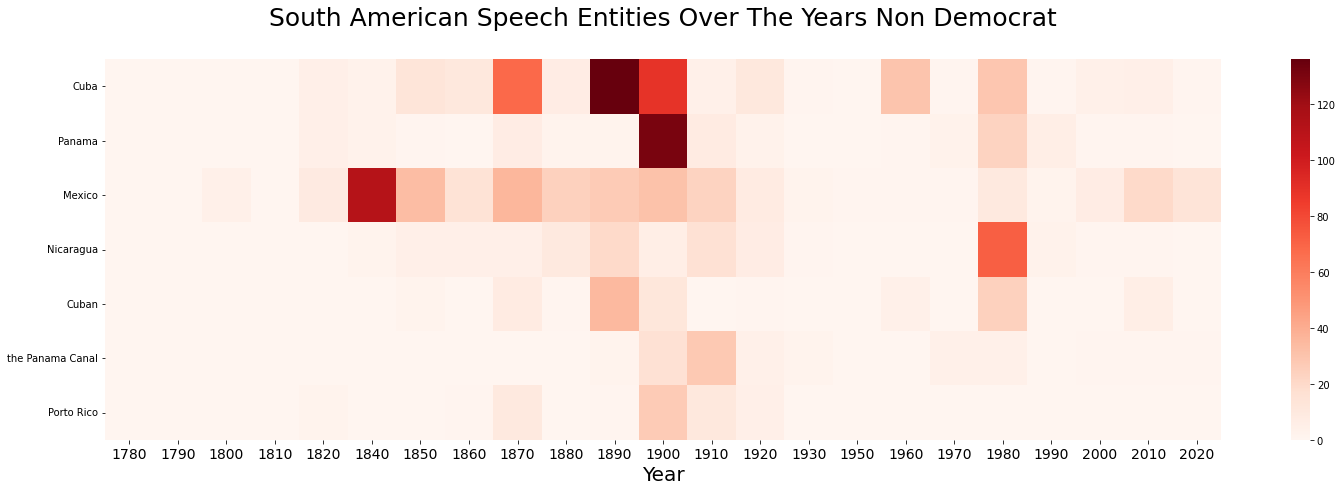

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/2722386813.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


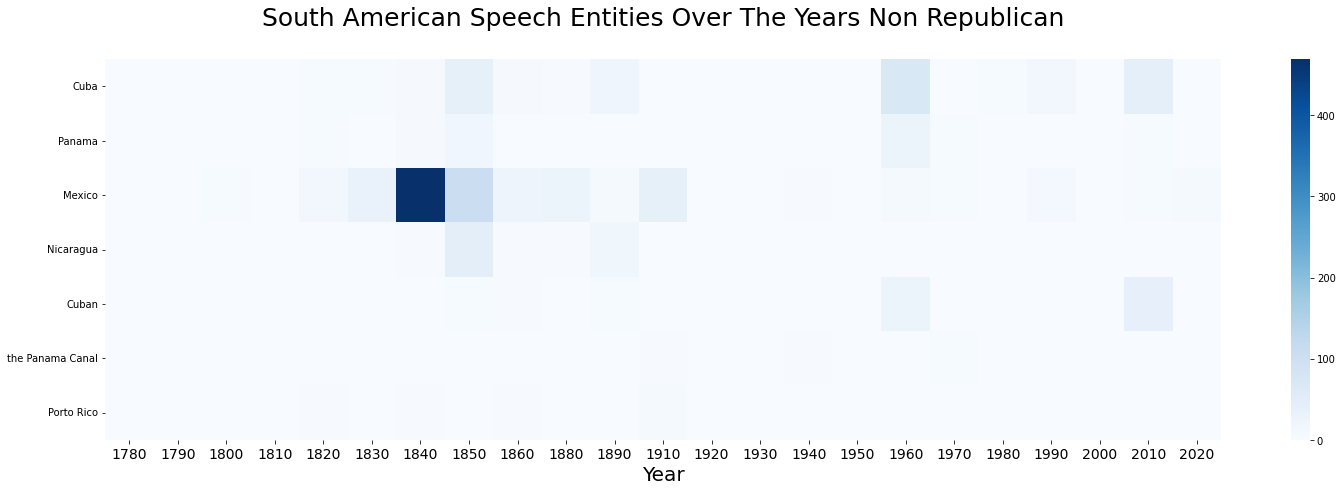

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/2722386813.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


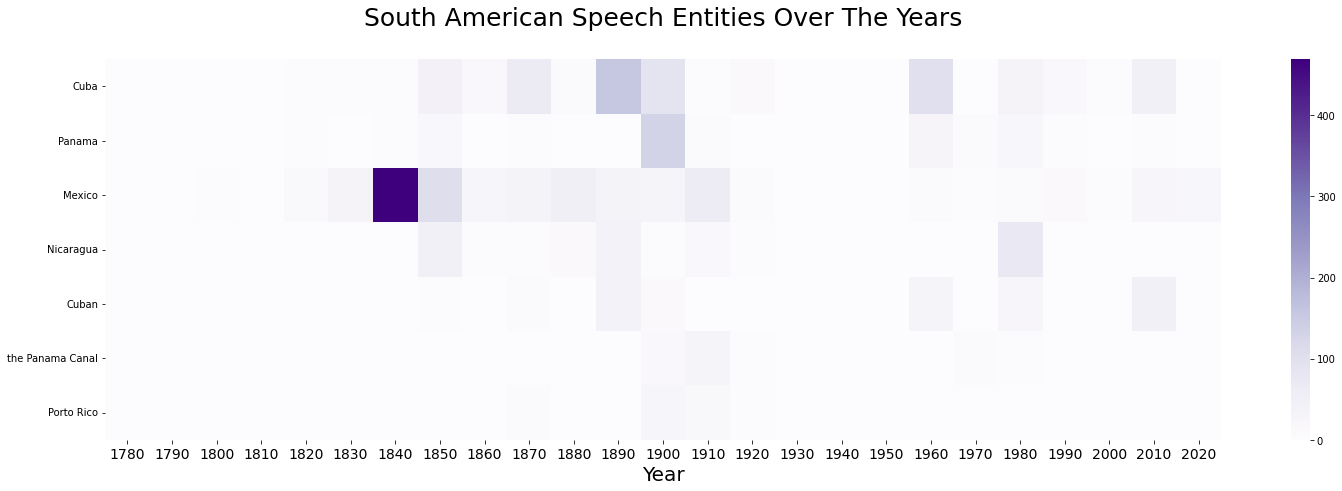

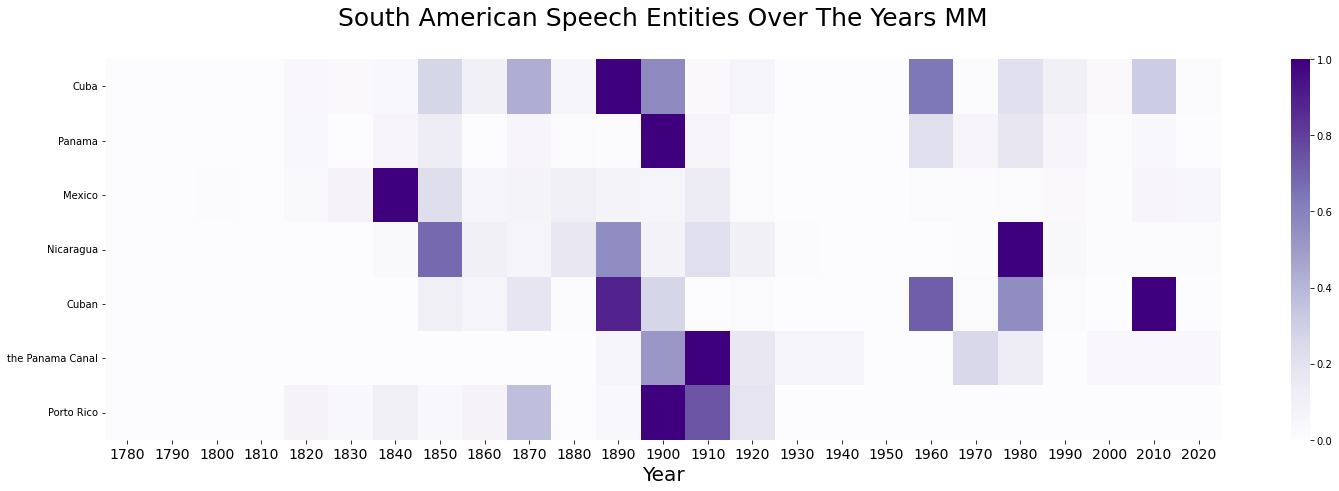

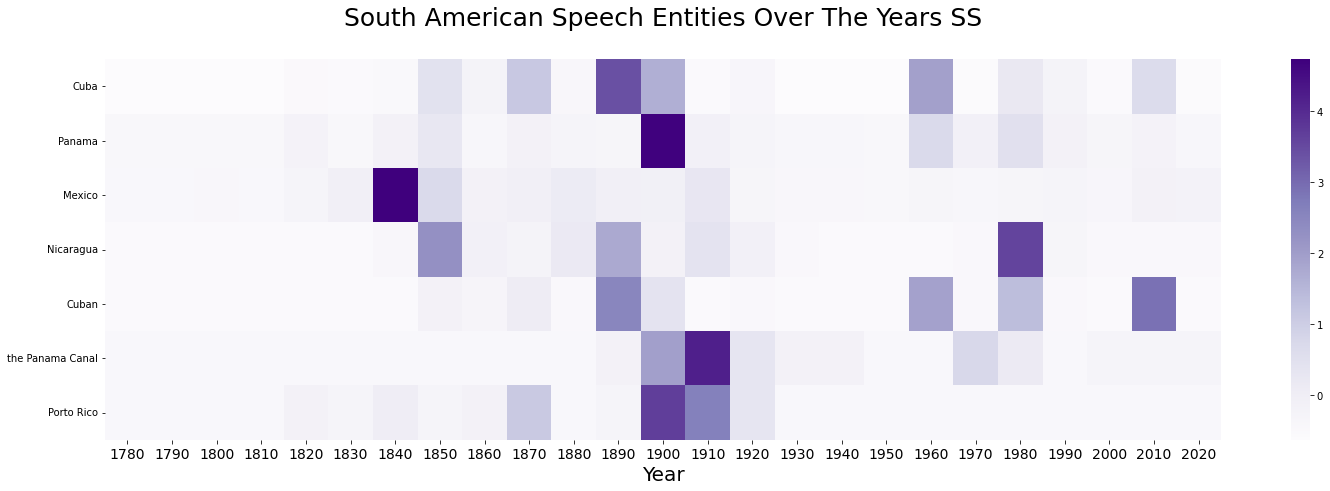

In [50]:
data = [
    "Cuba: 618", "Panama: 261", "Mexico: 978", "Nicaragua: 224",
    "Cuban: 174", "the Panama Canal: 73", "Porto Rico: 72"
]

# Splitting each string at ':' and taking the first part
cleaned_list_South_American = [(item.split(':')[0] )for item in data]


##
##
##
non_democrat_df = letsgo[letsgo['_Party_'] != 'Democrat']
non_Republican_df = letsgo[letsgo['_Party_'] != 'Republican']

import matplotlib.pyplot as plt

# Assuming non_democrat_df is your DataFrame
subs = cleaned_list_South_American

# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_democrat_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Red')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('South American Sum of Specific Columns Non Democrat')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_Republican_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Blue')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('South American Sum of Specific Columns Non Republican')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()




def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

subs=non_democrat_df[cleaned_list_South_American]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Reds')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('South American Speech Entities Over The Years Non Democrat\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()






subs=non_Republican_df[cleaned_list_South_American]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Blues')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('South American Speech Entities Over The Years Non Republican\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

##
##
##


subs=letsgo[cleaned_list_South_American]
def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()

result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)



# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Purples')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('South American Speech Entities Over The Years\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

# Assuming df is your DataFrame



# Initialize a Min-Max Scaler
scaler = MinMaxScaler()

# Scale the data
subs_scaled = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25,7))
sns.heatmap(subs_scaled.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('South American Speech Entities Over The Years MM\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()



# Initialize a Standard Scaler
scaler = StandardScaler()

# Scale the data
letsgo_standardized = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(letsgo_standardized.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('South American Speech Entities Over The Years SS\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

## Chart 3

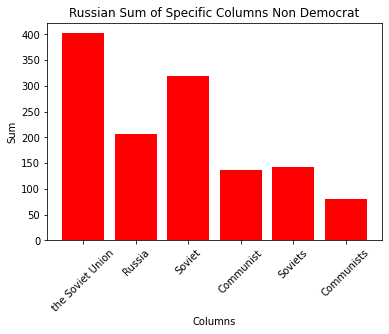

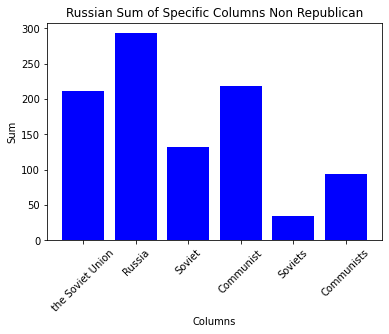

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/471102476.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


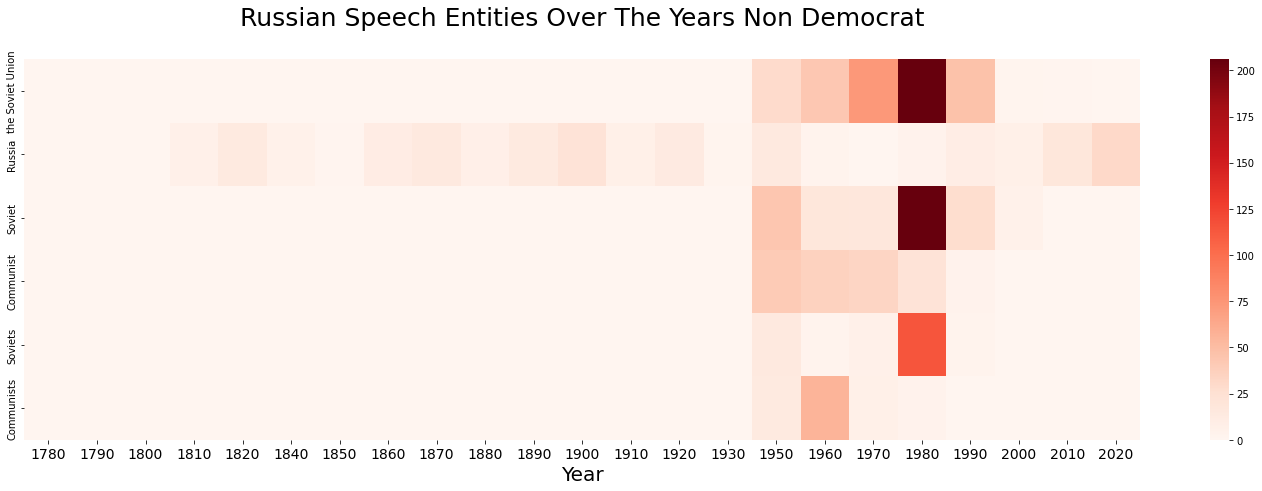

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/471102476.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


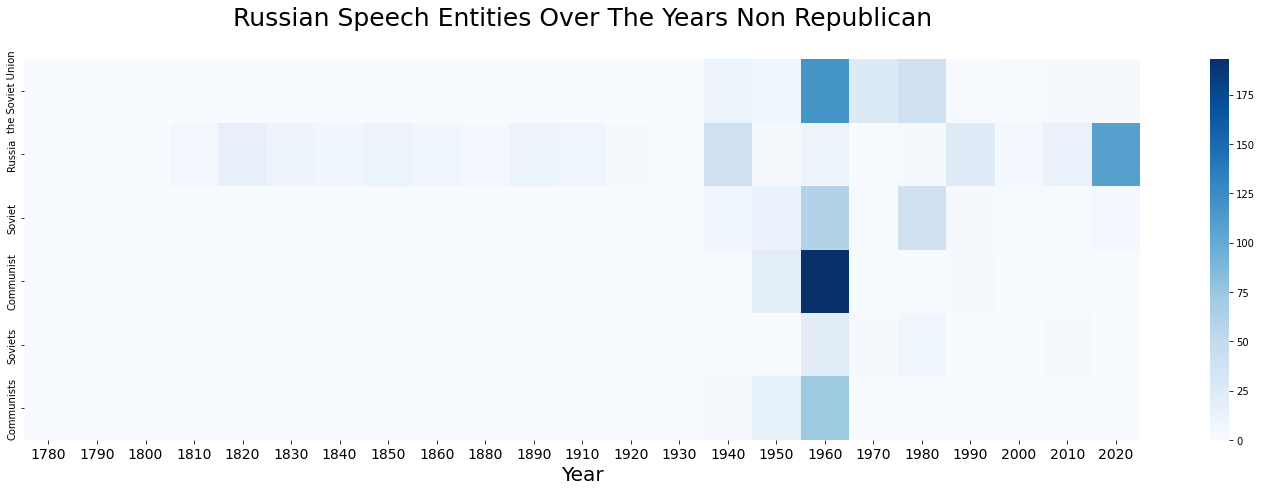

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/471102476.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


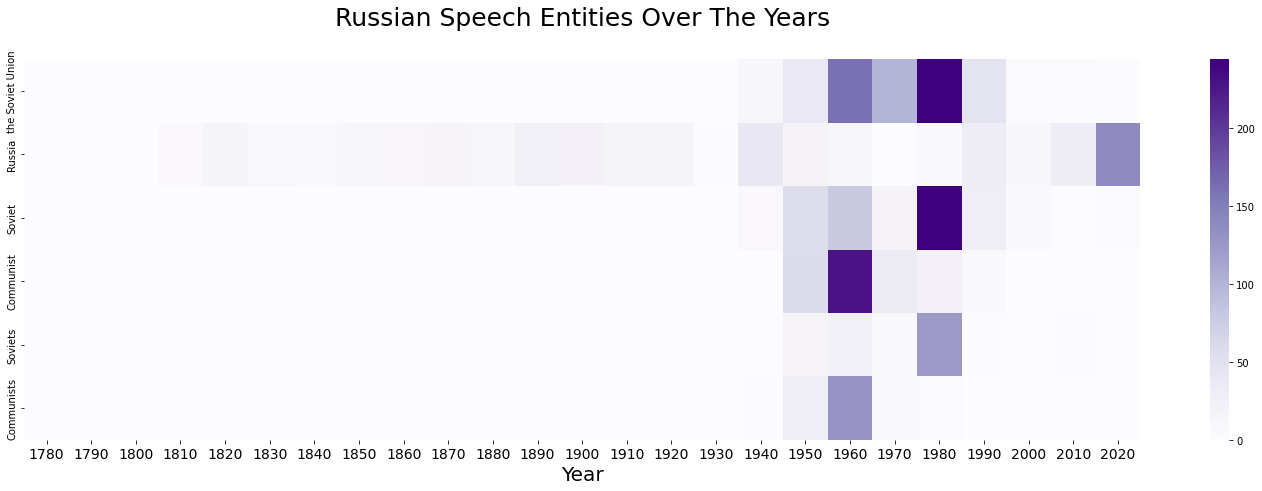

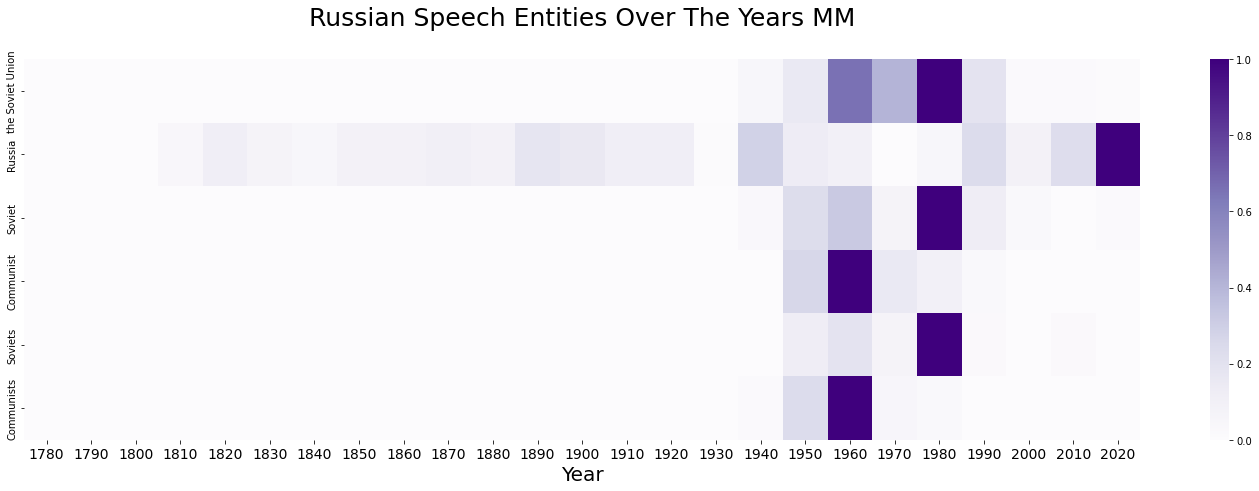

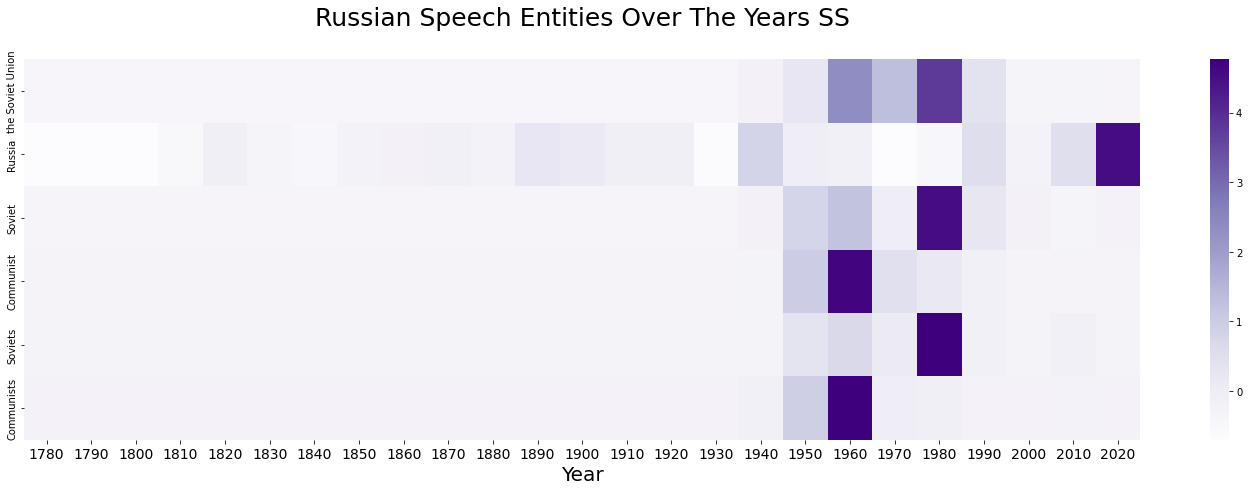

In [51]:
data = [
    "the Soviet Union: 613", "Russia: 467", "Soviet: 450",
    "Communist: 354", "Soviets: 177", "Communists: 175"
]


# Splitting each string at ':' and taking the first part
# Splitting each string at ':' and taking the first part
cleaned_list_russian = [item.split(':')[0] for item in data]


##
##
##
non_democrat_df = letsgo[letsgo['_Party_'] != 'Democrat']
non_Republican_df = letsgo[letsgo['_Party_'] != 'Republican']

import matplotlib.pyplot as plt

# Assuming non_democrat_df is your DataFrame
subs = cleaned_list_russian

# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_democrat_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Red')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Russian Sum of Specific Columns Non Democrat')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_Republican_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Blue')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Russian Sum of Specific Columns Non Republican')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()




def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

subs=non_democrat_df[cleaned_list_russian]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Reds')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Russian Speech Entities Over The Years Non Democrat\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()






subs=non_Republican_df[cleaned_list_russian]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Blues')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Russian Speech Entities Over The Years Non Republican\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

##
##
##


subs=letsgo[cleaned_list_russian]
def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()

result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)



# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Purples')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Russian Speech Entities Over The Years\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

# Assuming df is your DataFrame



# Initialize a Min-Max Scaler
scaler = MinMaxScaler()

# Scale the data
subs_scaled = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25,7))
sns.heatmap(subs_scaled.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Russian Speech Entities Over The Years MM\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()



# Initialize a Standard Scaler
scaler = StandardScaler()

# Scale the data
letsgo_standardized = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(letsgo_standardized.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Russian Speech Entities Over The Years SS\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

## Chart 4

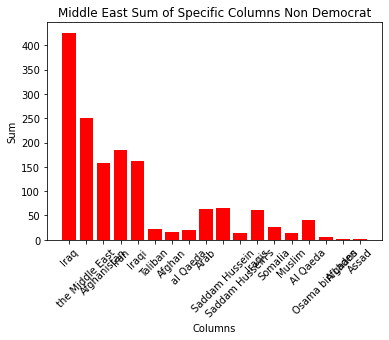

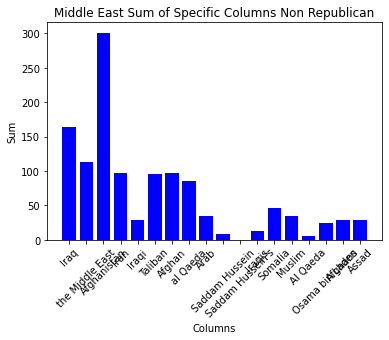

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1182309373.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


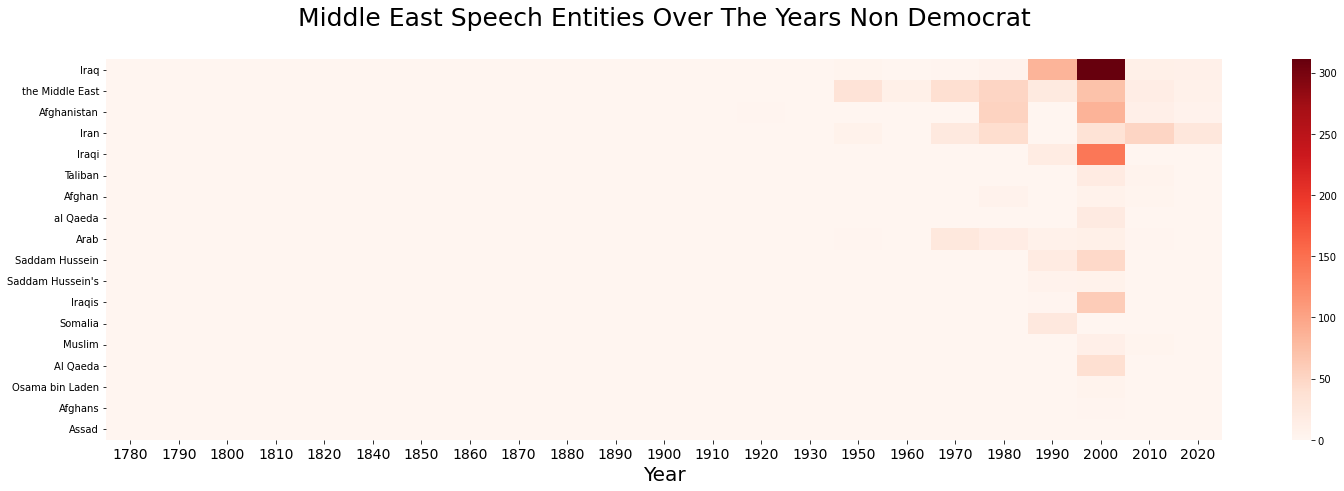

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1182309373.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


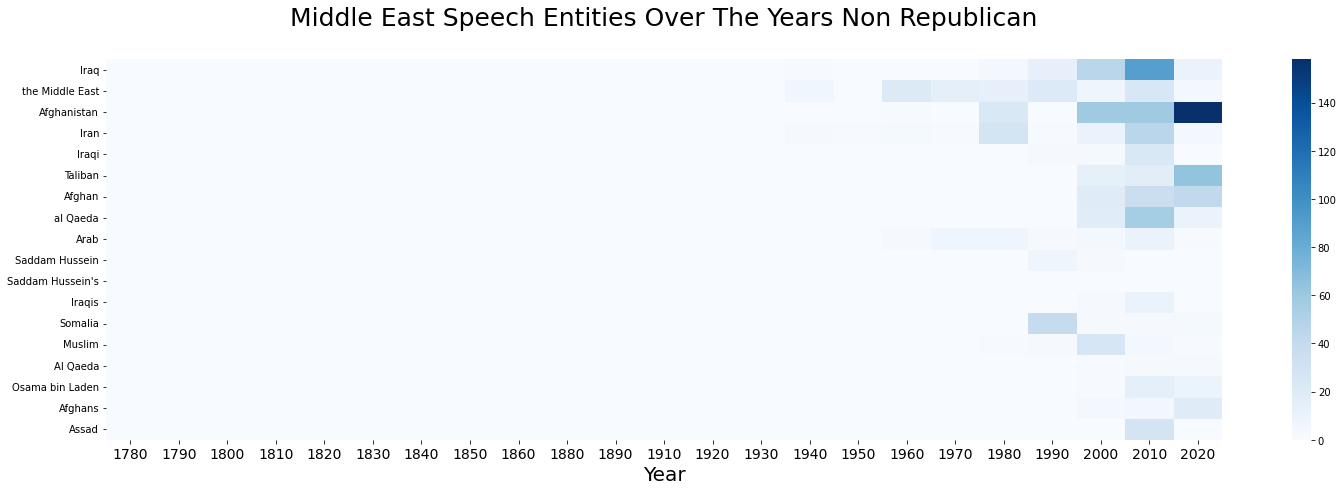

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1182309373.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


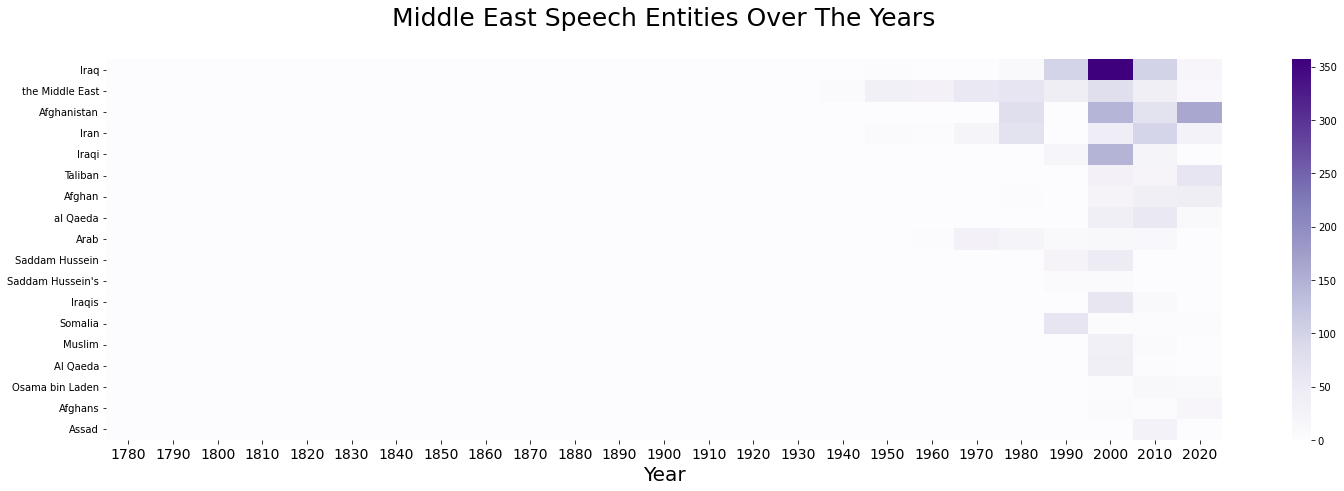

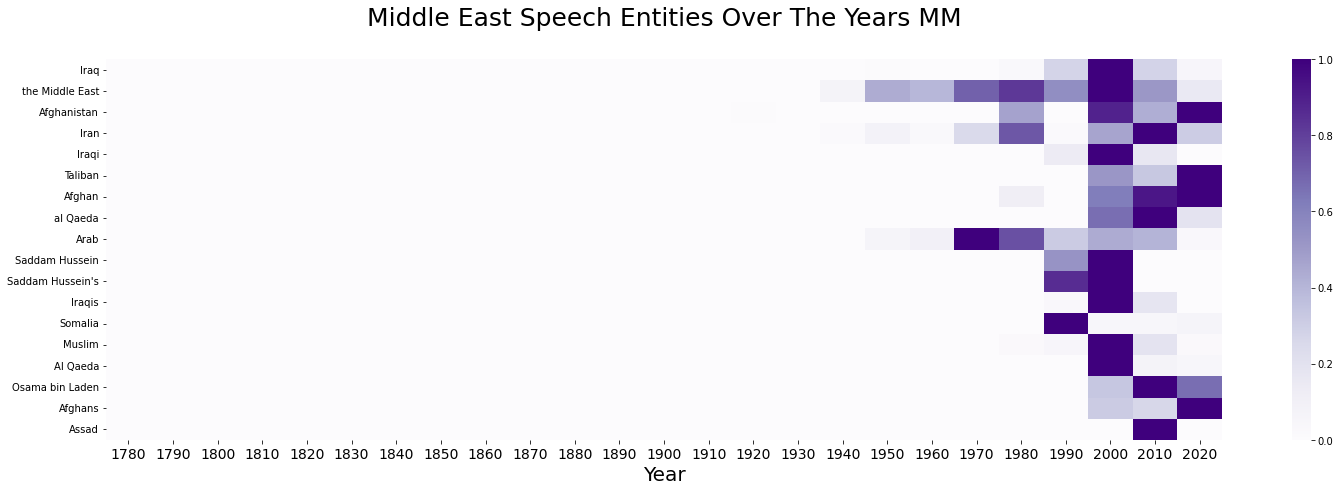

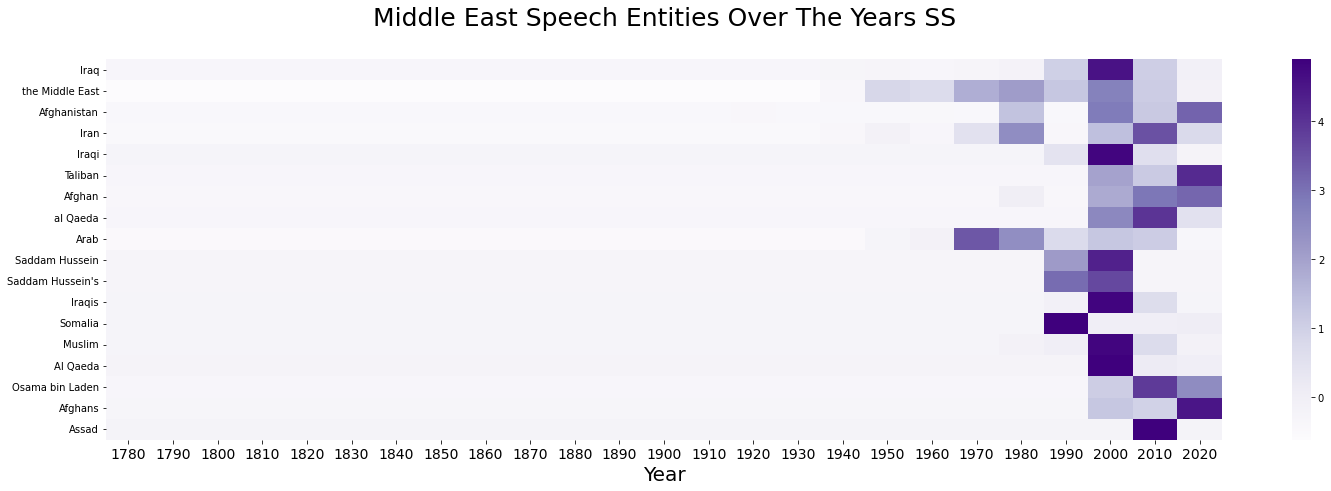

In [52]:
data = [
    "Iraq: 590", "the Middle East: 363", "Afghanistan: 458", "Iran: 282", 
    "Iraqi: 191", "Taliban: 118", "Afghan: 112", "al Qaeda: 106", 
    "Arab: 99", "Saddam Hussein: 75", "Saddam Hussein's: 13", 
    "Iraqis: 75", "Somalia: 73", "Muslim: 48", "Al Qaeda: 45", 
    "Osama bin Laden: 30", "Afghans: 30", "Assad: 30"
]



# Splitting each string at ':' and taking the first part
# Splitting each string at ':' and taking the first part
cleaned_list_Middle_east = [item.split(':')[0] for item in data]


##
##
##
non_democrat_df = letsgo[letsgo['_Party_'] != 'Democrat']
non_Republican_df = letsgo[letsgo['_Party_'] != 'Republican']

import matplotlib.pyplot as plt

# Assuming non_democrat_df is your DataFrame
subs = cleaned_list_Middle_east

# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_democrat_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Red')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Middle East Sum of Specific Columns Non Democrat')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_Republican_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Blue')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Middle East Sum of Specific Columns Non Republican')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()




def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

subs=non_democrat_df[cleaned_list_Middle_east]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Reds')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Middle East Speech Entities Over The Years Non Democrat\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()






subs=non_Republican_df[cleaned_list_Middle_east]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Blues')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Middle East Speech Entities Over The Years Non Republican\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

##
##
##


subs=letsgo[cleaned_list_Middle_east]
def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()

result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)



# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Purples')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Middle East Speech Entities Over The Years\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

# Assuming df is your DataFrame



# Initialize a Min-Max Scaler
scaler = MinMaxScaler()

# Scale the data
subs_scaled = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25,7))
sns.heatmap(subs_scaled.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Middle East Speech Entities Over The Years MM\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()



# Initialize a Standard Scaler
scaler = StandardScaler()

# Scale the data
letsgo_standardized = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(letsgo_standardized.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Middle East Speech Entities Over The Years SS\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

 ## Chart 5

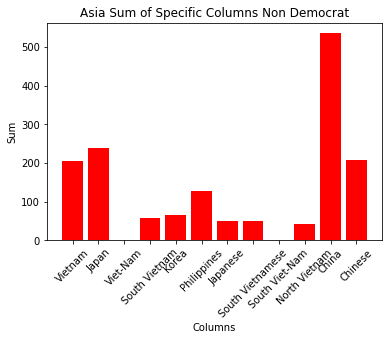

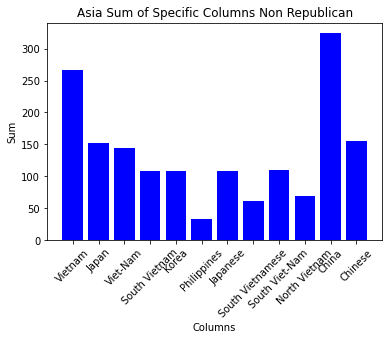

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1561884217.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


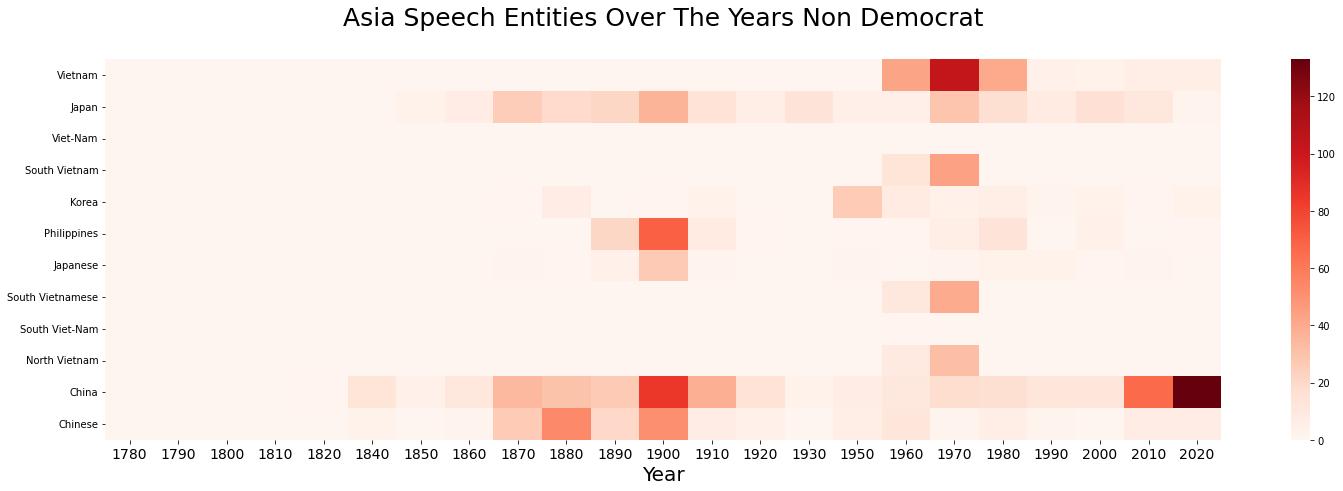

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1561884217.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


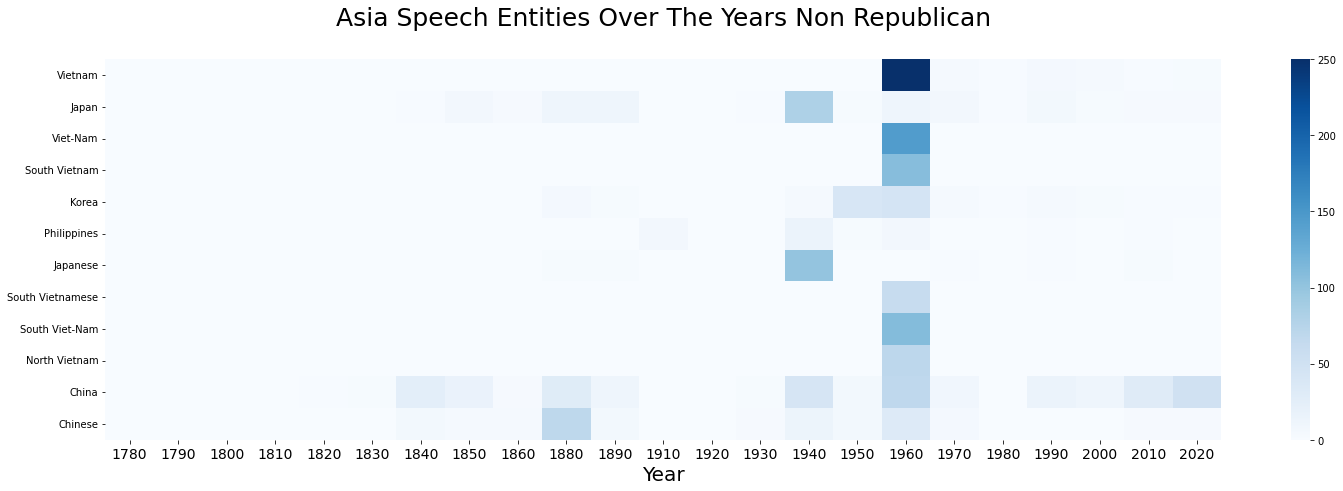

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1561884217.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


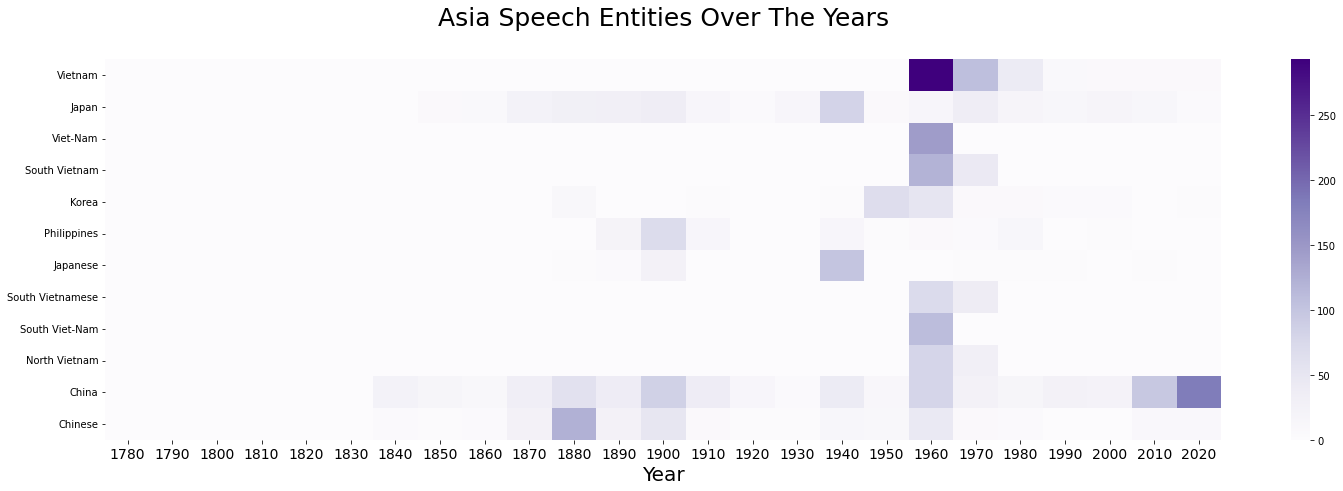

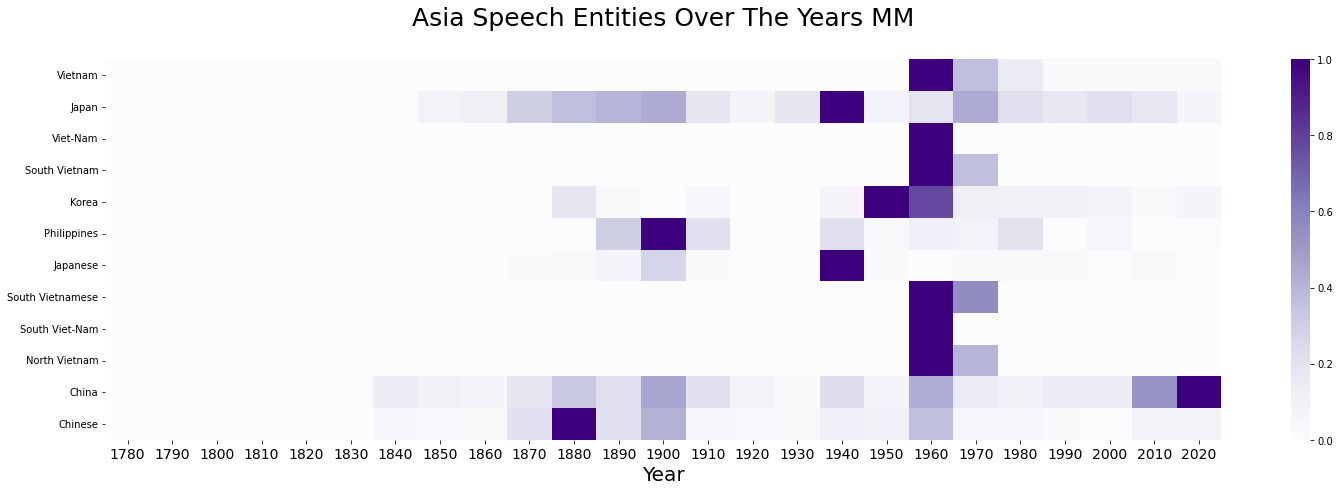

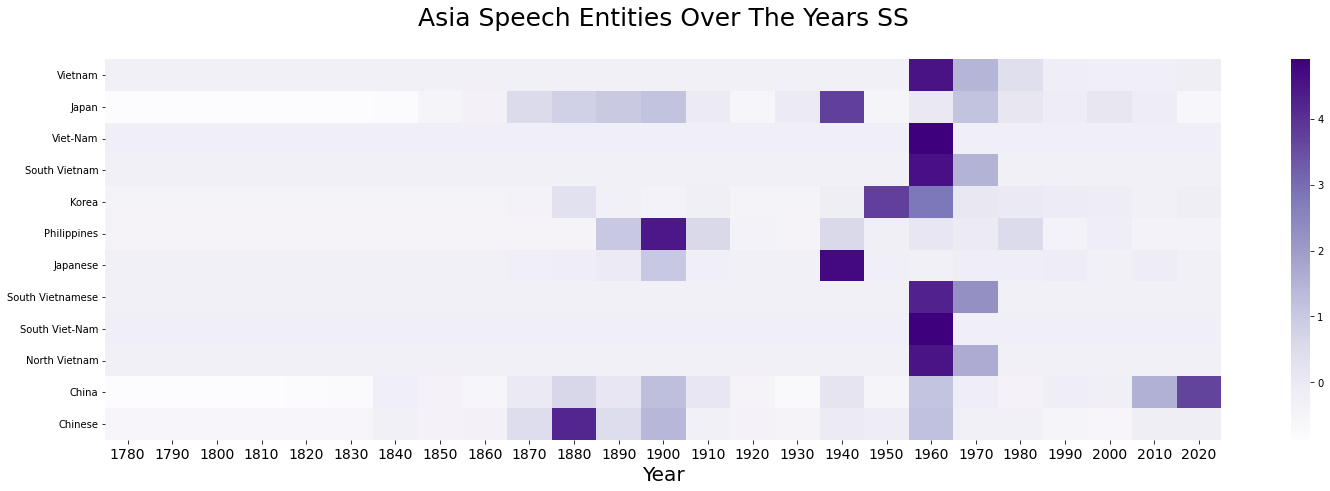

In [53]:
data = [
    "Vietnam: 473", "Japan: 387", "Viet-Nam: 145", "South Vietnam: 165",
    "Korea: 174", "Philippines: 160", "Japanese: 157",
    "South Vietnamese: 112", "South Viet-Nam: 111", "North Vietnam: 111",
    "China: 841", "Chinese: 361"
]



# Splitting each string at ':' and taking the first part
# Splitting each string at ':' and taking the first part
cleaned_list_Asia = [item.split(':')[0] for item in data]


##
##
##
non_democrat_df = letsgo[letsgo['_Party_'] != 'Democrat']
non_Republican_df = letsgo[letsgo['_Party_'] != 'Republican']

import matplotlib.pyplot as plt

# Assuming non_democrat_df is your DataFrame
subs = cleaned_list_Asia

# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_democrat_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Red')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Asia Sum of Specific Columns Non Democrat')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_Republican_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Blue')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Asia Sum of Specific Columns Non Republican')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()




def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

subs=non_democrat_df[cleaned_list_Asia]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Reds')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Asia Speech Entities Over The Years Non Democrat\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()






subs=non_Republican_df[cleaned_list_Asia]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Blues')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Asia Speech Entities Over The Years Non Republican\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

##
##
##


subs=letsgo[cleaned_list_Asia]
def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()

result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)



# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Purples')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Asia Speech Entities Over The Years\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

# Assuming df is your DataFrame



# Initialize a Min-Max Scaler
scaler = MinMaxScaler()

# Scale the data
subs_scaled = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25,7))
sns.heatmap(subs_scaled.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Asia Speech Entities Over The Years MM\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()



# Initialize a Standard Scaler
scaler = StandardScaler()

# Scale the data
letsgo_standardized = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(letsgo_standardized.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Asia Speech Entities Over The Years SS\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

## Chart 6

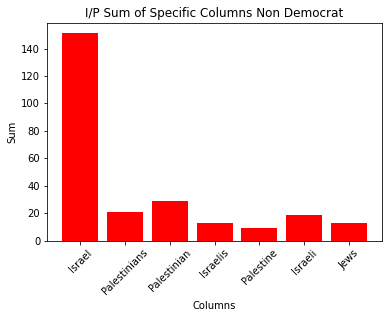

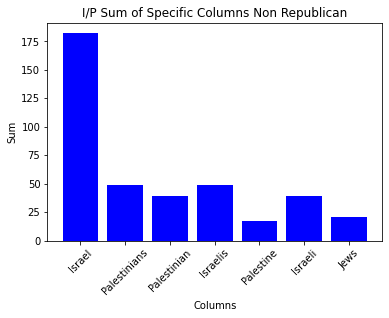

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1006309903.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


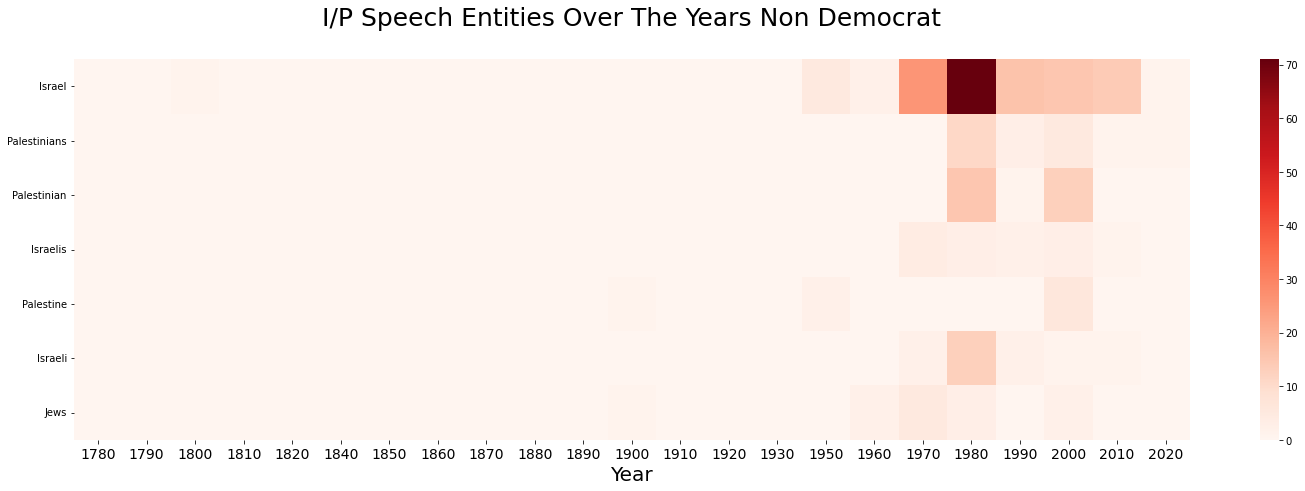

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1006309903.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


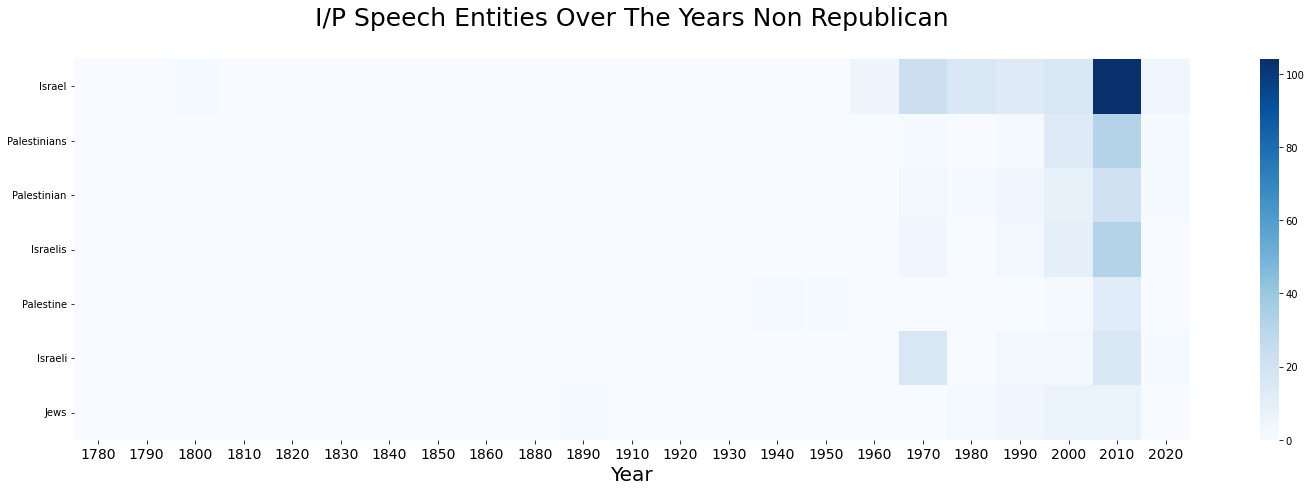

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1006309903.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


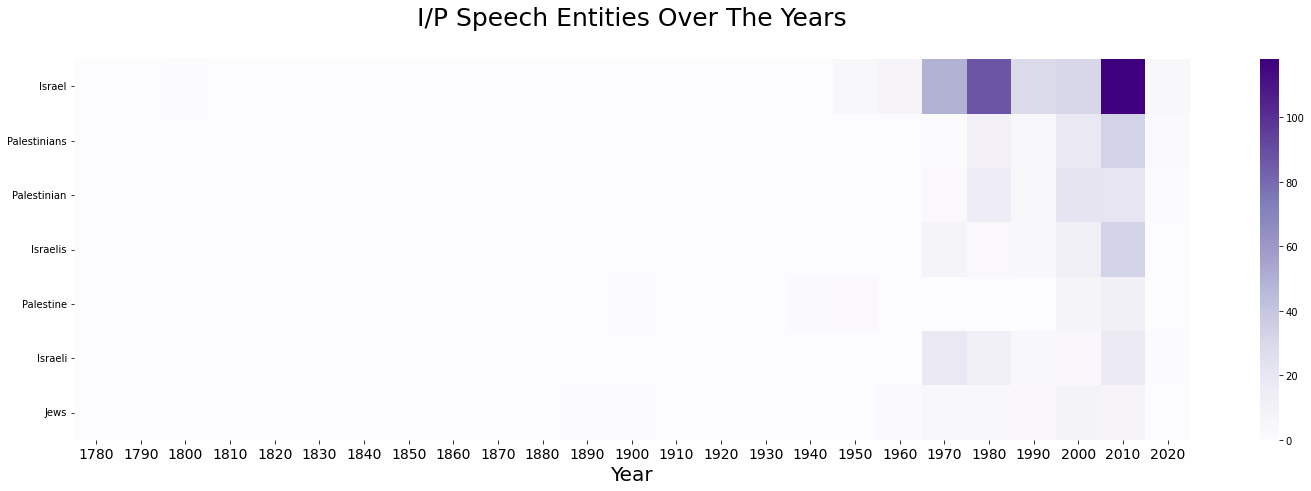

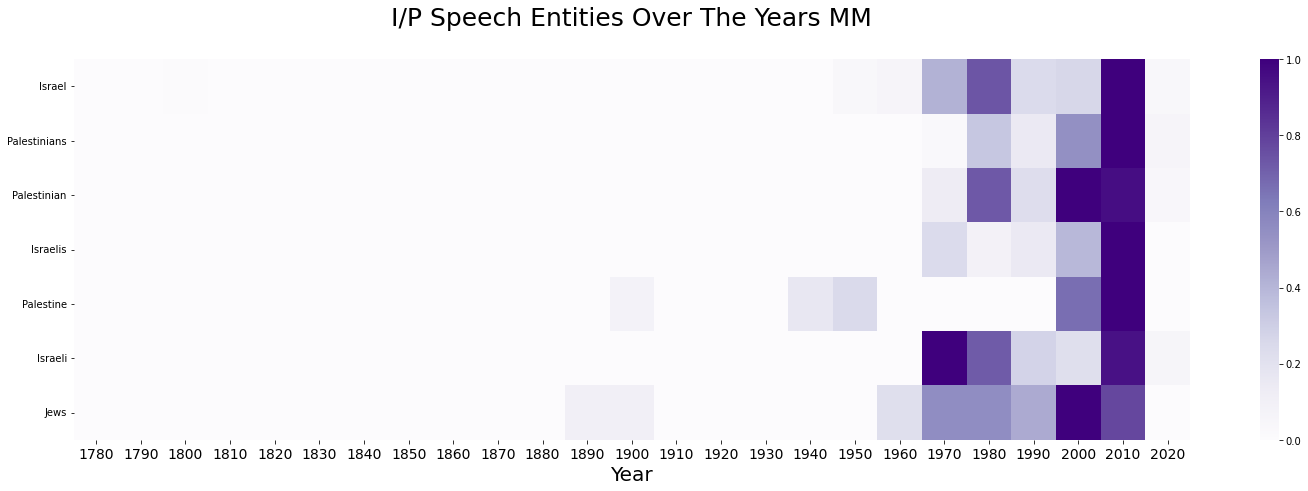

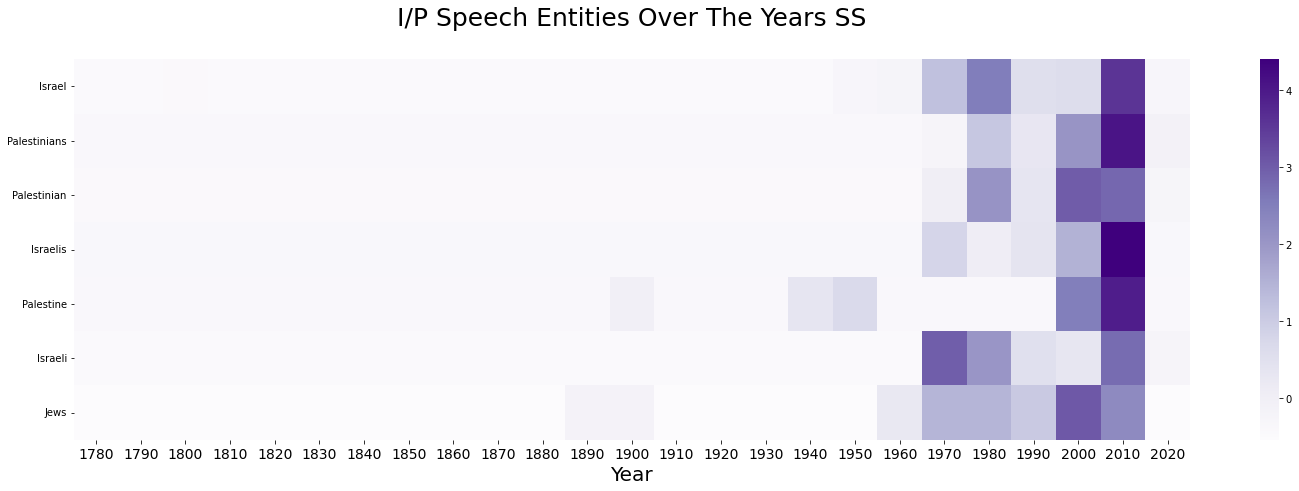

In [54]:
data = [
    "Israel: 332", "Palestinians: 70", "Palestinian: 68", 
    "Israelis: 62", "Palestine: 26", "Israeli: 58", "Jews: 34"
]


# Splitting each string at ':' and taking the first part
cleaned_list_I_P = [item.split(':')[0] for item in data]


##
##
##
non_democrat_df = letsgo[letsgo['_Party_'] != 'Democrat']
non_Republican_df = letsgo[letsgo['_Party_'] != 'Republican']

import matplotlib.pyplot as plt

# Assuming non_democrat_df is your DataFrame
subs = cleaned_list_I_P

# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_democrat_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Red')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('I/P Sum of Specific Columns Non Democrat')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_Republican_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Blue')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('I/P Sum of Specific Columns Non Republican')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()




def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

subs=non_democrat_df[cleaned_list_I_P]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Reds')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('I/P Speech Entities Over The Years Non Democrat\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()






subs=non_Republican_df[cleaned_list_I_P]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Blues')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('I/P Speech Entities Over The Years Non Republican\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

##
##
##


subs=letsgo[cleaned_list_I_P]
def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()

result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)



# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Purples')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('I/P Speech Entities Over The Years\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

# Assuming df is your DataFrame



# Initialize a Min-Max Scaler
scaler = MinMaxScaler()

# Scale the data
subs_scaled = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25,7))
sns.heatmap(subs_scaled.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('I/P Speech Entities Over The Years MM\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()



# Initialize a Standard Scaler
scaler = StandardScaler()

# Scale the data
letsgo_standardized = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(letsgo_standardized.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('I/P Speech Entities Over The Years SS\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

## Chart 7

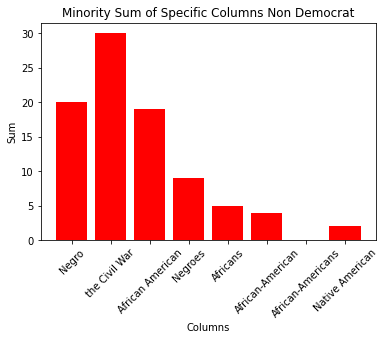

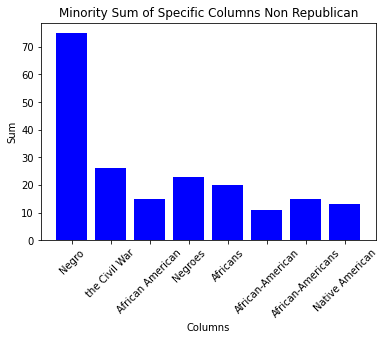

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1218743107.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


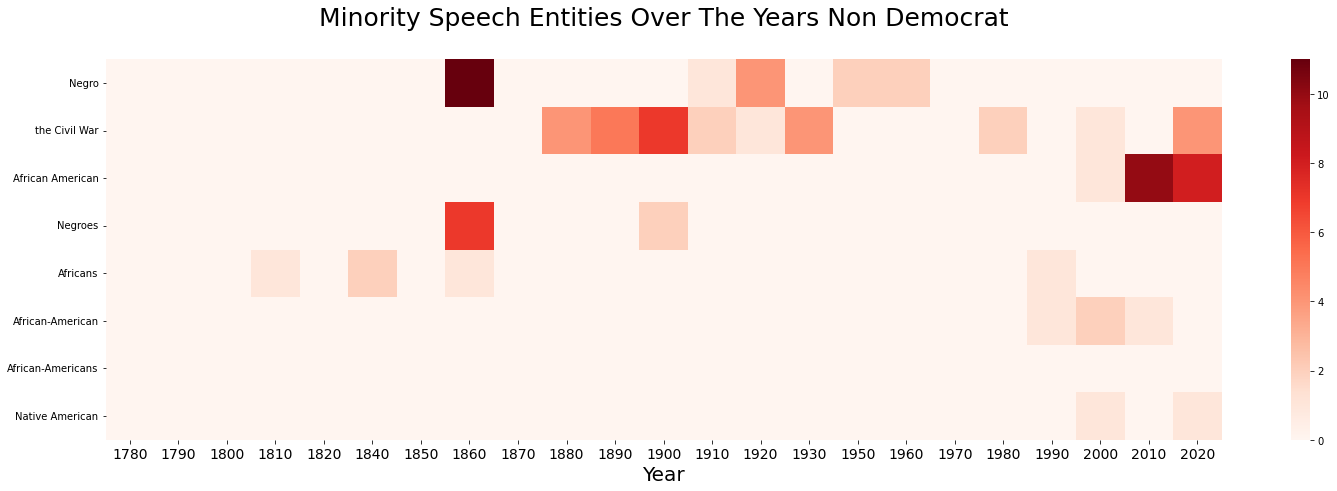

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1218743107.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


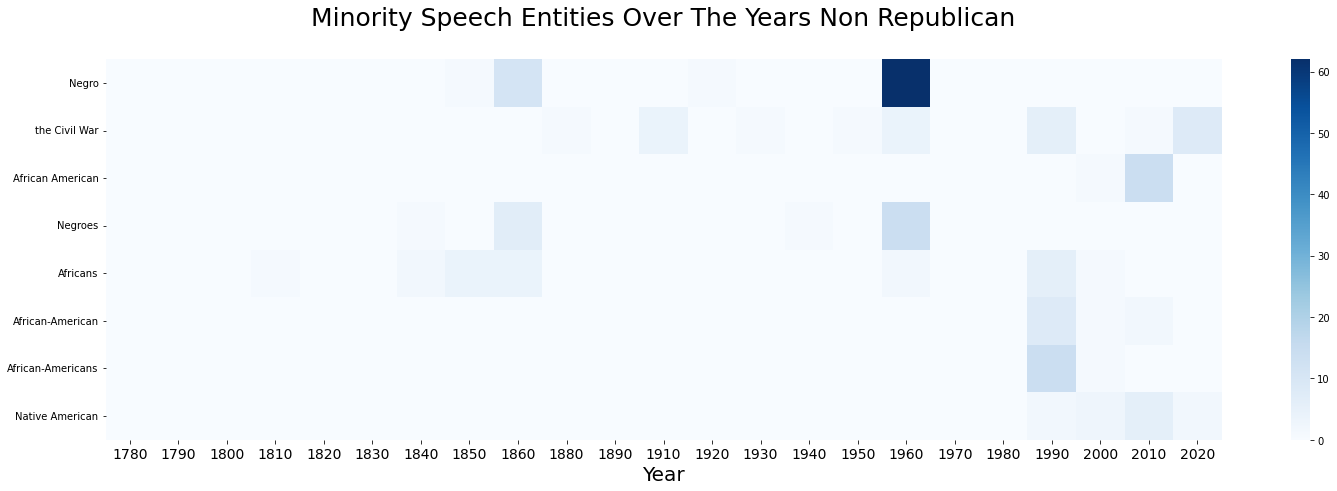

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/1218743107.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


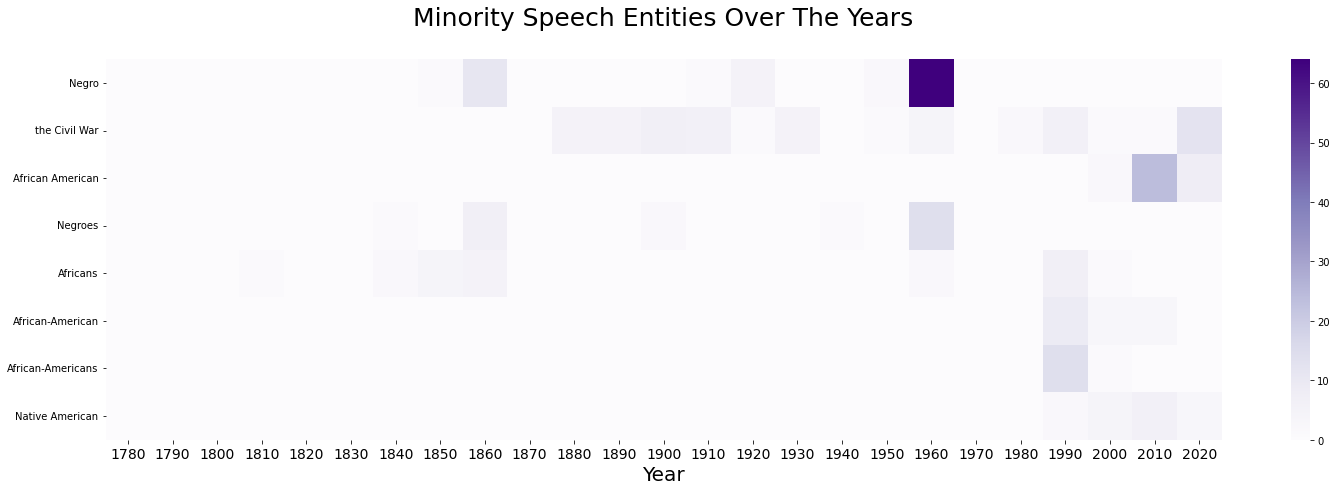

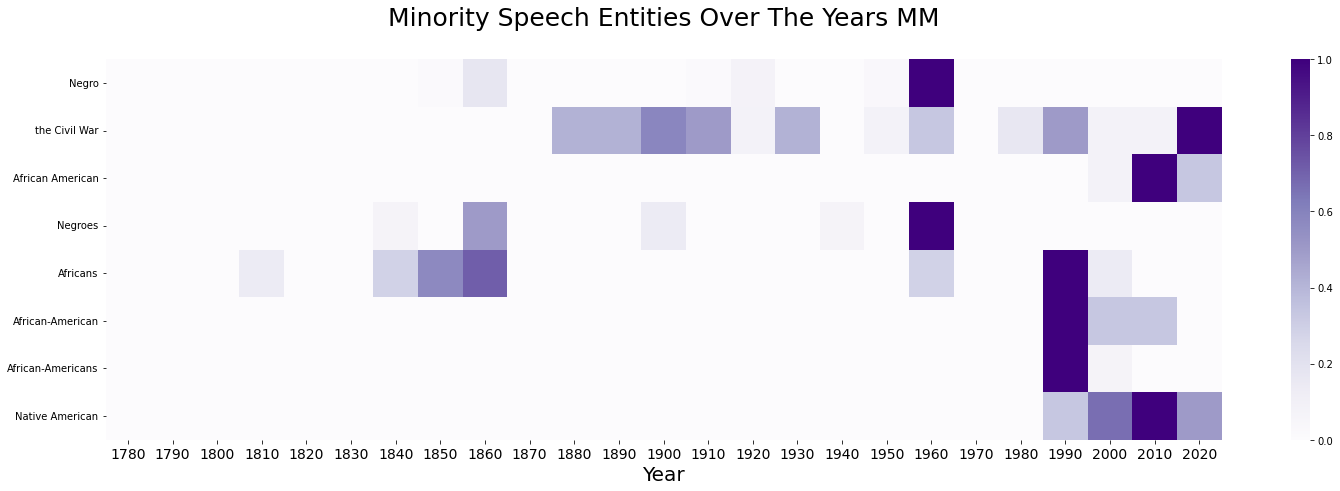

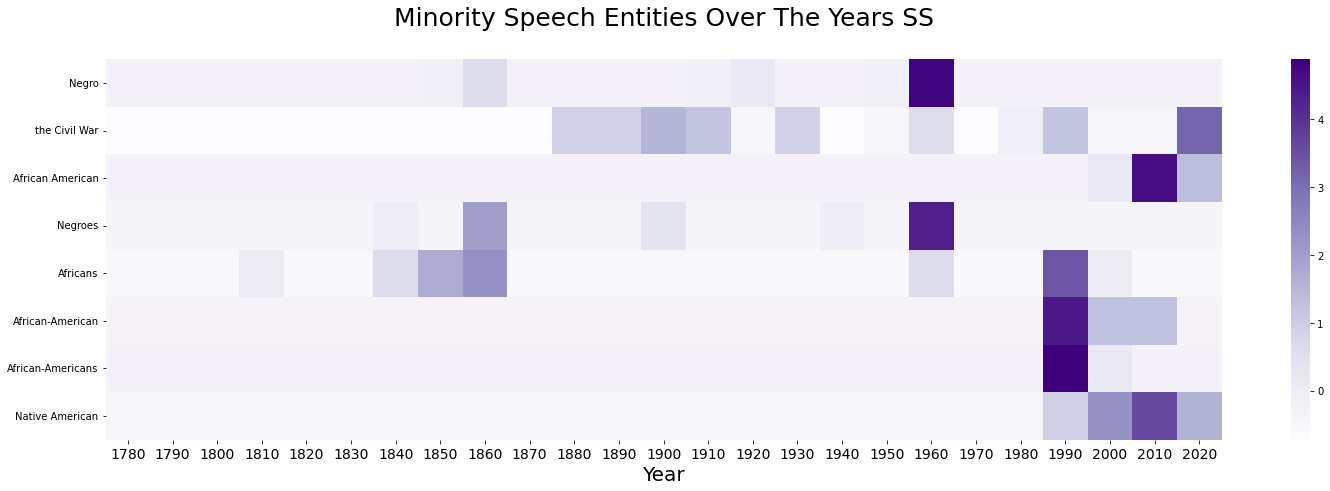

In [55]:
data = [
    "Negro: 84", "the Civil War: 56", "African American: 34", 
    "Negroes: 25", "Africans: 22", "African-American: 15", 
    "African-Americans: 15", "Native American: 15"
]


# Splitting each string at ':' and taking the first part
cleaned_list_Minority = [item.split(':')[0] for item in data]


##
##
##
non_democrat_df = letsgo[letsgo['_Party_'] != 'Democrat']
non_Republican_df = letsgo[letsgo['_Party_'] != 'Republican']

import matplotlib.pyplot as plt

# Assuming non_democrat_df is your DataFrame
subs = cleaned_list_Minority

# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_democrat_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Red')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Minority Sum of Specific Columns Non Democrat')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_Republican_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Blue')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Minority Sum of Specific Columns Non Republican')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()




def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

subs=non_democrat_df[cleaned_list_Minority]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Reds')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Minority Speech Entities Over The Years Non Democrat\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()






subs=non_Republican_df[cleaned_list_Minority]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Blues')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Minority Speech Entities Over The Years Non Republican\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

##
##
##


subs=letsgo[cleaned_list_Minority]
def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()

result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)



# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Purples')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Minority Speech Entities Over The Years\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

# Assuming df is your DataFrame



# Initialize a Min-Max Scaler
scaler = MinMaxScaler()

# Scale the data
subs_scaled = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25,7))
sns.heatmap(subs_scaled.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Minority Speech Entities Over The Years MM\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()



# Initialize a Standard Scaler
scaler = StandardScaler()

# Scale the data
letsgo_standardized = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(letsgo_standardized.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Minority Speech Entities Over The Years SS\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

## Chart 8

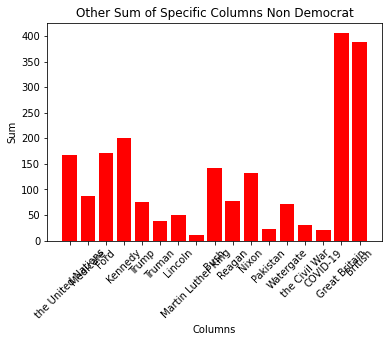

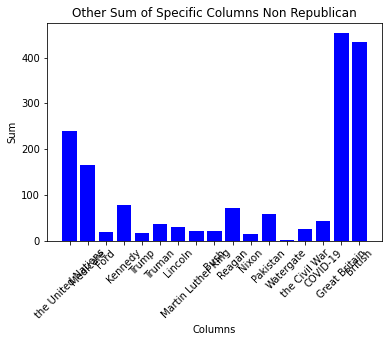

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/2289395876.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


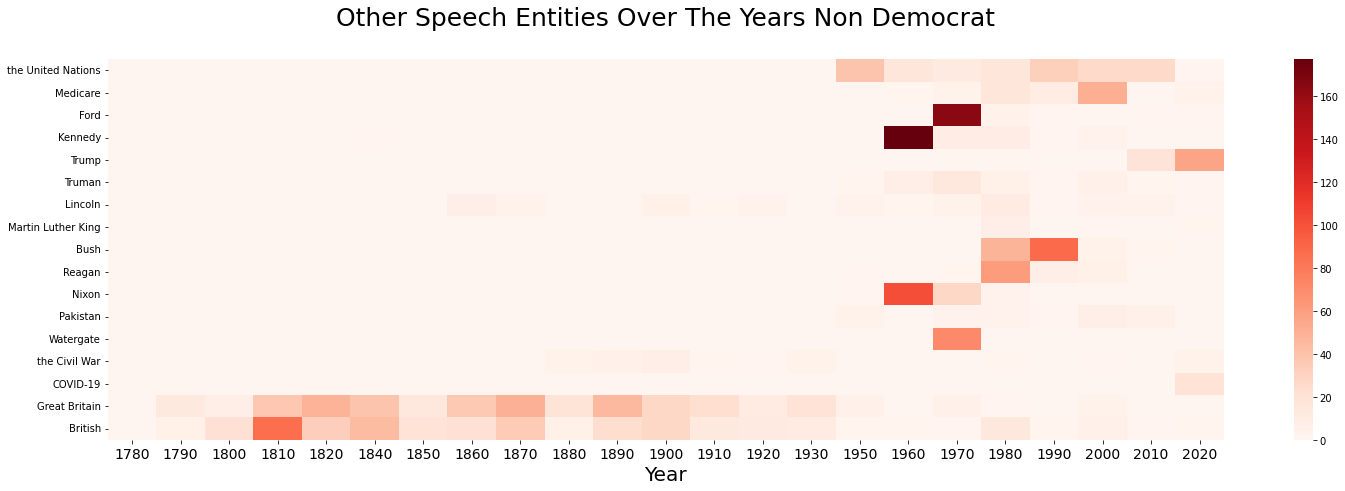

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/2289395876.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


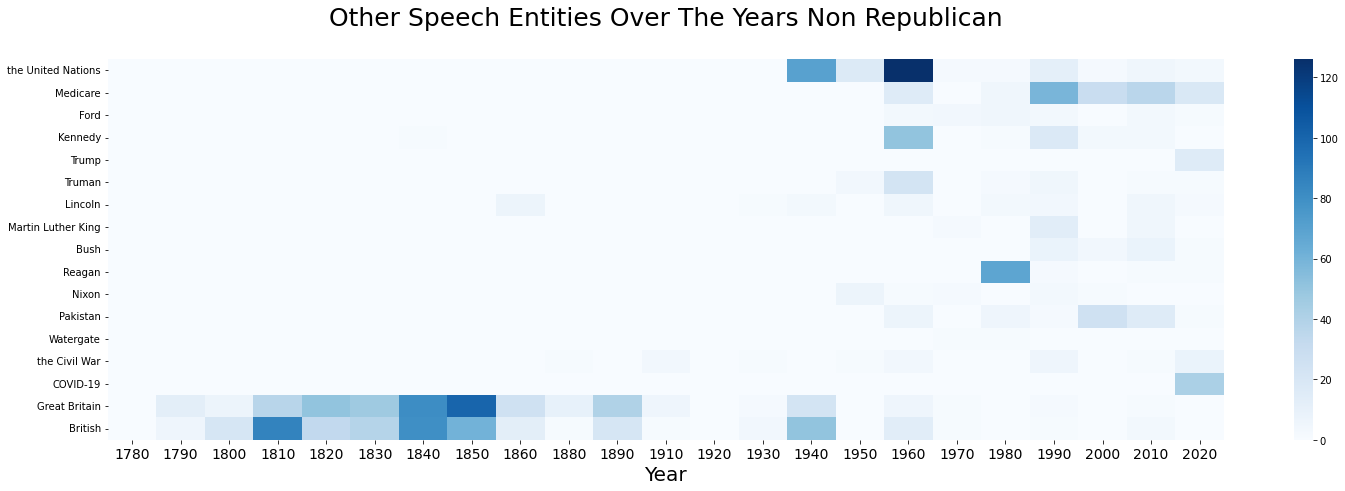

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_3661/2289395876.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)


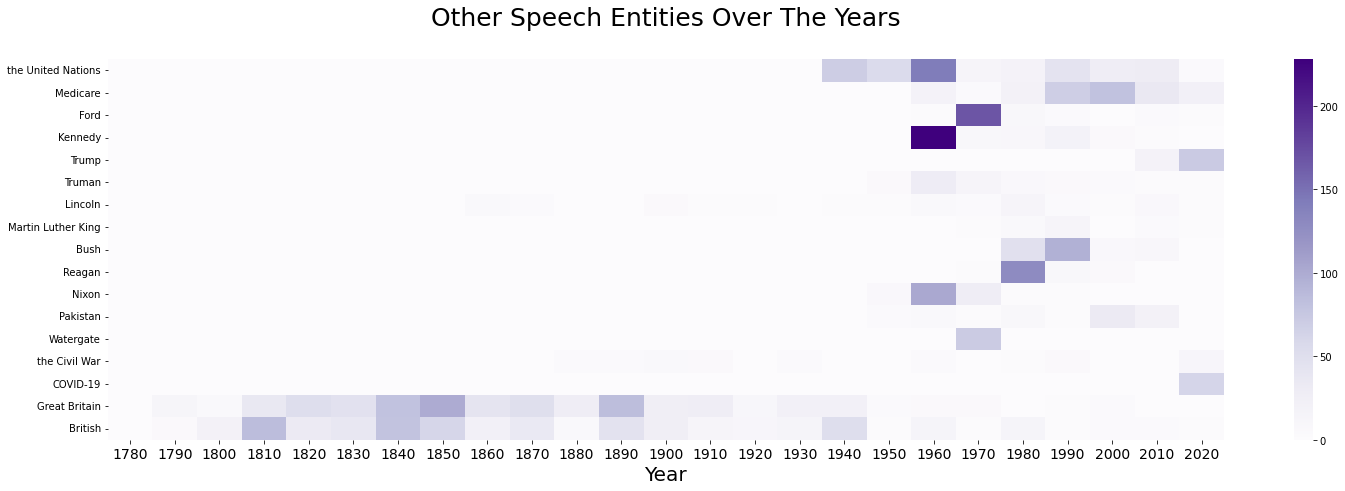

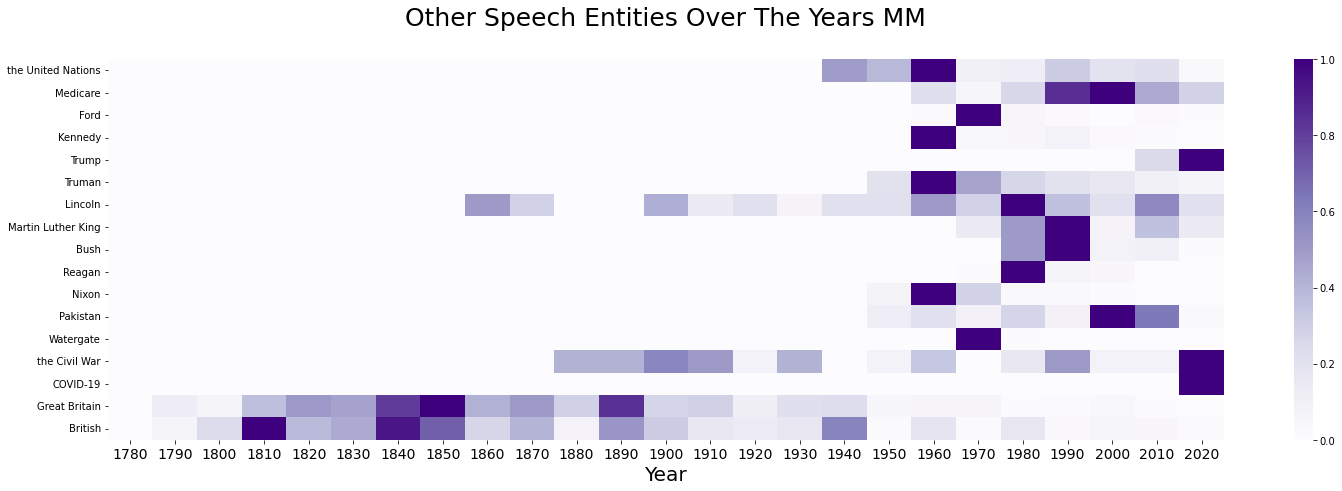

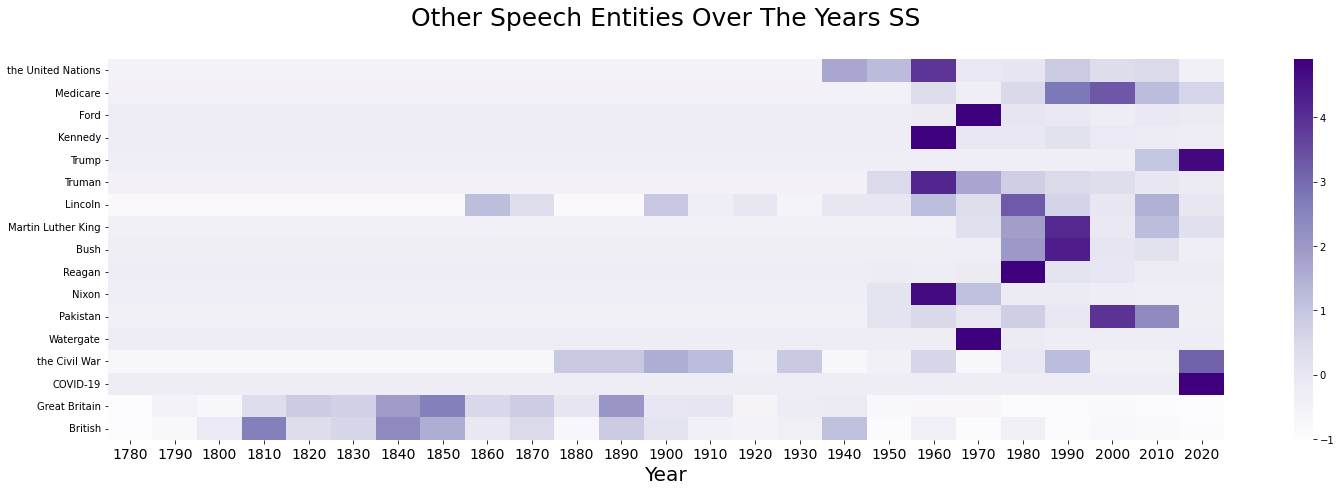

In [56]:
data = [
    "the United Nations: 407", "Medicare: 252", "Ford: 190", "Kennedy: 276",
    "Trump: 91", "Truman: 74", "Lincoln: 73", "Martin Luther King: 31",
    "Bush: 163", "Reagan: 149", "Nixon: 147", "Pakistan: 81",
    "Watergate: 73", "the Civil War: 56", "COVID-19: 62", "Great Britain: 679",
    "British: 603"
]



# Splitting each string at ':' and taking the first part
cleaned_list_assorted = [item.split(':')[0] for item in data]


##
##
##
non_democrat_df = letsgo[letsgo['_Party_'] != 'Democrat']
non_Republican_df = letsgo[letsgo['_Party_'] != 'Republican']

import matplotlib.pyplot as plt

# Assuming non_democrat_df is your DataFrame
subs = cleaned_list_assorted

# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_democrat_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Red')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Other Sum of Specific Columns Non Democrat')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


# Calculate the sum of each column
sums = []
for column in subs:
    sums.append(non_Republican_df[column].sum())

# Create a bar chart using the sums
plt.bar(subs, sums, color='Blue')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Other Sum of Specific Columns Non Republican')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()




def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

subs=non_democrat_df[cleaned_list_assorted]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Reds')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Other Speech Entities Over The Years Non Democrat\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()






subs=non_Republican_df[cleaned_list_assorted]

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()


result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)

# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Blues')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Other Speech Entities Over The Years Non Republican\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

##
##
##


subs=letsgo[cleaned_list_assorted]
def map_to_interval(year):
    return f"{(year // 10) * 10}-{(year // 10) * 10 + 9}"

# Assign years to intervals
subs['Interval'] = letsgo["_Year_"].astype(int).map(map_to_interval)

# Group by interval and sum
result_df = subs.groupby('Interval').sum()

result_df.index= result_df.index.astype(str).str[:4]
result_df.rename_axis("year", inplace=True)



# Set the size of the heatmap
plt.figure(figsize=(25, 7))  # You can adjust the size as needed

# Create the heatmap
sns.heatmap(result_df.T, annot=False, cmap='Purples')  # 'annot=False' hides the data values, 'cmap' sets the color map

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Other Speech Entities Over The Years\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

# Assuming df is your DataFrame



# Initialize a Min-Max Scaler
scaler = MinMaxScaler()

# Scale the data
subs_scaled = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25,7))
sns.heatmap(subs_scaled.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Other Speech Entities Over The Years MM\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()



# Initialize a Standard Scaler
scaler = StandardScaler()

# Scale the data
letsgo_standardized = pd.DataFrame(scaler.fit_transform(result_df), columns=result_df.columns, index=result_df.index)

# Create the heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(letsgo_standardized.T, annot=False, cmap='Purples')

plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.title('Other Speech Entities Over The Years SS\n', fontsize=25)
#plt.savefig('Speech_heatmap.png');
plt.show()

# Relation Extraction

In [57]:
file=pd.read_csv("outputfinal_filename.csv")
file

doc_name        date  \
0                 april-30-1789-first-inaugural-address  1789-04-30   
1              october-3-1789-thanksgiving-proclamation  1789-10-03   
2          january-8-1790-first-annual-message-congress  1790-01-08   
3        december-8-1790-second-annual-message-congress  1790-12-08   
4     december-29-1790-talk-chiefs-and-counselors-se...  1790-12-29   
...                                                 ...         ...   
1056   may-24-2022-remarks-school-shooting-uvalde-texas  2022-05-25   
1057  september-1-2022-remarks-continued-battle-soul...  2022-09-02   
1058  september-21-2022-speech-77th-session-united-n...  2022-09-21   
1059                february-7-2023-state-union-address  2023-02-08   
1060  february-21-2023-remarks-one-year-anniversary-...  2023-02-22   

                                             transcript          president  \
0     Fellow Citizens of the Senate and the House of...  George Washington   
1     Whereas it is the duty of all Nations to ackno...  George Washington   
2     Fellow Citizens of the Senate and House of Rep...  George Washington   
3      Fellow citizens of the Senate and House of Re...  George Washington   
4      I the President of the United States, by my o...  George Washington   
...                                                 ...                ...   
1056  Good evening, fellow Americans.\r\n\r\nI had h...          Joe Biden   
1057  THE PRESIDENT: My fellow Americans, please, if...          Joe Biden   
1058  Thank you. \r\n\r\nMr. President, Mr. Secretar...          Joe Biden   
1059  Mr. Speaker. Madam Vice President. Our First L...          Joe Biden   
1060  THE PRESIDENT:  Hello, Poland! One of our grea...          Joe Biden   

                                                  title  Year  
0               April 30, 1789: First Inaugural Address  1789  
1            October 3, 1789: Thanksgiving Proclamation  1789  
2     January 8, 1790: First Annual Message to Congress  1790  
3     December 8, 1790: Second Annual Message to Con...  1790  
4     December 29, 1790: Talk to the Chiefs and Coun...  1790  
...                                                 ...   ...  
1056  May 24, 2022: Remarks on School Shooting in Uv...  2022  
1057  September 1, 2022: Remarks on the Continued Ba...  2022  
1058  September 21, 2022: Speech before the 77th Ses...  2022  
1059       February 7, 2023: State of the Union Address  2023  
1060  February 21, 2023: Remarks on the One-Year Ann...  2023  

[1061 rows x 6 columns]

## This took really long and coldnt be run in Juypter, cause it didnt let me install Neuralcoref due to Juypter inability to install spacey 2.1.1, so made an environment through the terminal and was abel to install Neuracoref in conda

In [ ]:
## i made a seperate python file that can be run in the folder woth this file
## Refer to the python file 'neurl_coref.py'

'''
!pip install spacey==2.1.1
!pip install neuralcoref

import spacy
import neuralcoref
import pandas as pd

file=pd.read_csv("outputfinal_filename.csv")

nlp = spacy.load('en_core_web_sm')
neuralcoref.add_to_pipe(nlp)

overall = pd.DataFrame(columns=['doc_name', 'date', 'transcript', 'president', 'title', 'Year'])

for i in range(len(file)):
    prez=str(file.loc[i, "president"])
    trans=str(file.loc[i, "transcript"])
    prez= prez.replace(" ", "")
    final= trans.replace('I ',""+prez+" " )
    doc=nlp(final)
    resolved_text = doc._.coref_resolved
    
    overall.loc[i, 'doc_name']= file.loc[i, "doc_name"]
    overall.loc[i, 'date']= file.loc[i, "date"]
    overall.loc[i, 'transcript']= resolved_text
    overall.loc[i, 'president']= file.loc[i, "president"]
    overall.loc[i, 'title']= file.loc[i, "title"]
    overall.loc[i, 'Year']= file.loc[i, "Year"]
    
    print(""+str(i)+"/"+str(len(file))+"")
    
    
    
    
overall.reset_index(inplace=True)
overall.drop('index', axis=1, inplace=True)   
overall.to_csv('neuraled.csv', index=False)

'''

In [58]:
file=pd.read_csv("neuraled.csv")
file

doc_name        date  \
0                 april-30-1789-first-inaugural-address  1789-04-30   
1              october-3-1789-thanksgiving-proclamation  1789-10-03   
2          january-8-1790-first-annual-message-congress  1790-01-08   
3        december-8-1790-second-annual-message-congress  1790-12-08   
4     december-29-1790-talk-chiefs-and-counselors-se...  1790-12-29   
...                                                 ...         ...   
1056   may-24-2022-remarks-school-shooting-uvalde-texas  2022-05-25   
1057  september-1-2022-remarks-continued-battle-soul...  2022-09-02   
1058  september-21-2022-speech-77th-session-united-n...  2022-09-21   
1059                february-7-2023-state-union-address  2023-02-08   
1060  february-21-2023-remarks-one-year-anniversary-...  2023-02-22   

                                             transcript          president  \
0     Fellow Citizens of the Senate and the House of...  George Washington   
1     Whereas it is the duty of all Nations to ackno...  George Washington   
2     Fellow Citizens of the Senate and House of Rep...  George Washington   
3      Fellow citizens of the Senate and House of Re...  George Washington   
4      GeorgeWashington the President of the United ...  George Washington   
...                                                 ...                ...   
1056  Good evening, fellow Americans.\r\n\r\nJoeBide...          Joe Biden   
1057  THE PRESIDENT: My fellow Americans, please, if...          Joe Biden   
1058  Thank you. \r\n\r\nMr. President, Mr. Secretar...          Joe Biden   
1059  Mr. Speaker. Madam Vice President. Our First L...          Joe Biden   
1060  THE PRESIDENT:  Hello, Poland! One of our grea...          Joe Biden   

                                                  title  Year  
0               April 30, 1789: First Inaugural Address  1789  
1            October 3, 1789: Thanksgiving Proclamation  1789  
2     January 8, 1790: First Annual Message to Congress  1790  
3     December 8, 1790: Second Annual Message to Con...  1790  
4     December 29, 1790: Talk to the Chiefs and Coun...  1790  
...                                                 ...   ...  
1056  May 24, 2022: Remarks on School Shooting in Uv...  2022  
1057  September 1, 2022: Remarks on the Continued Ba...  2022  
1058  September 21, 2022: Speech before the 77th Ses...  2022  
1059       February 7, 2023: State of the Union Address  2023  
1060  February 21, 2023: Remarks on the One-Year Ann...  2023  

[1061 rows x 6 columns]

## This took really long

In [59]:
# refer to the python file "relation.py"
'''
file=pd.read_csv("neuraled.csv")
# Load spaCy model
nlp = spacy.load('en_core_web_sm')
relations = pd.DataFrame(columns=['entity1','entity2',  'sentiment',  'date',  'president', 'title', 'Year'])

for e in range(int(len(file))):
    
    text = file.loc[e, 'transcript' ]
    print(""+str(e)+"/"+str(int(len(file)))+"")

    # Process the text
    doc = nlp(text)

    # Assuming we are interested in relations involving two proper nouns (entities)
    entities = [ent for ent in doc if ent.pos_ == 'PROPN']

    
    ## precations to make sure two word entites are not being analysied seperately
    p=0
    # Extracting relationships and performing sentiment analysis
    for i in range(len(entities)-1):
        entity1 = entities[i]

        # Example: Checking if entities appear in the same sentence
        combined_entities = str(entity1) + ' ' + str(entities[i+1])
                                                     
        if p>0:
            p=p-1
            continue
        k=0
        if combined_entities in entity1.sent.text:
            entity1= combined_entities
            k=k+1
        for j in range(i+1, len(entities)):
            entity2 = entities[j]

            if k==1:
                k=k-1
                p=p+1
                continue

            if (j < len(entities)-2):
                # Example: Checking if entities appear in the same sentence
                combined_entities = str(entity2) + ' ' + str(entities[j+1])

            if combined_entities in entity2.sent.text:
                entity2= combined_entities





            # Example: Checking if entities appear in the same sentence

            if entities[i].sent == entities[j].sent :
                # Sentiment analysis on the sentence
                sentiment = TextBlob(str(entities[i].sent)).sentiment
                
                
                rel = pd.DataFrame({
                    'entity1': [entity1],
                    'entity2': [entity2],

                    'sentiment': [sentiment.polarity], # Polarity score: -1 (negative) to 1 (positive)
     
                    'date': [file.loc[e, 'date']],
    
                    'president': [file.loc[e, 'president']],
                    'title': [file.loc[e, 'title']],
                    'Year': [file.loc[e, 'Year']]
                })
                relations=pd.concat([relations,rel],ignore_index=True) 
                
relations.reset_index(inplace=True)
relations.drop('index', axis=1, inplace=True)   
relations.to_csv('relationships1.csv', index=False) 

'''

'\nfile=pd.read_csv("neuraled.csv")\n# Load spaCy model\nnlp = spacy.load(\'en_core_web_sm\')\nrelations = pd.DataFrame(columns=[\'entity1\',\'entity2\',  \'sentiment\',  \'date\',  \'president\', \'title\', \'Year\'])\n\nfor e in range(int(len(file))):\n    \n    text = file.loc[e, \'transcript\' ]\n    print(""+str(e)+"/"+str(int(len(file)))+"")\n\n    # Process the text\n    doc = nlp(text)\n\n    # Assuming we are interested in relations involving two proper nouns (entities)\n    entities = [ent for ent in doc if ent.pos_ == \'PROPN\']\n\n    \n    ## precations to make sure two word entites are not being analysied seperately\n    p=0\n    # Extracting relationships and performing sentiment analysis\n    for i in range(len(entities)-1):\n        entity1 = entities[i]\n\n        # Example: Checking if entities appear in the same sentence\n        combined_entities = str(entity1) + \' \' + str(entities[i+1])\n                                                     \n        if p>0:\n   

In [61]:
# Remove setiments that equal 0
relate= pd.read_csv('relationships1.csv')
relate=relate.loc[relate["sentiment"]!= 0.0]
relate.reset_index(inplace=True)
relate.drop('index', axis=1, inplace=True)   
relate.to_csv('relationships1.csv', index=False) 

In [62]:
relate= pd.read_csv('relationships1.csv')
relate

entity1           entity2  sentiment        date  \
0       GeorgeWashington           Country   0.233333  1789-04-30   
1       GeorgeWashington  GeorgeWashington   0.233333  1789-04-30   
2       GeorgeWashington  GeorgeWashington   0.233333  1789-04-30   
3                Country  GeorgeWashington   0.233333  1789-04-30   
4                Country  GeorgeWashington   0.233333  1789-04-30   
...                  ...               ...        ...         ...   
497537           Ukraine         — Ukraine   0.044583  2023-02-22   
497538           Ukraine           Ukraine   0.044583  2023-02-22   
497539         Ukraine —           Ukraine   0.044583  2023-02-22   
497540     United States            Allies   0.027778  2023-02-22   
497541                ’s         Americans   0.350000  2023-02-22   

                president                                              title  \
0       George Washington            April 30, 1789: First Inaugural Address   
1       George Washington            April 30, 1789: First Inaugural Address   
2       George Washington            April 30, 1789: First Inaugural Address   
3       George Washington            April 30, 1789: First Inaugural Address   
4       George Washington            April 30, 1789: First Inaugural Address   
...                   ...                                                ...   
497537          Joe Biden  February 21, 2023: Remarks on the One-Year Ann...   
497538          Joe Biden  February 21, 2023: Remarks on the One-Year Ann...   
497539          Joe Biden  February 21, 2023: Remarks on the One-Year Ann...   
497540          Joe Biden  February 21, 2023: Remarks on the One-Year Ann...   
497541          Joe Biden  February 21, 2023: Remarks on the One-Year Ann...   

        Year  
0       1789  
1       1789  
2       1789  
3       1789  
4       1789  
...      ...  
497537  2023  
497538  2023  
497539  2023  
497540  2023  
497541  2023  

[497542 rows x 7 columns]

In [63]:
chart = pd.DataFrame(columns=['entity1','entity2',  'avg_sentiment', 'entity_count', 'connect_count'])

## This took really long

In [64]:


'''
dup = relate.drop_duplicates(subset='entity1')
dup.reset_index(inplace=True)
dup.drop('index', axis=1, inplace=True)

for i in range(len(dup)):
    print(str(i)+'/'+str(len(dup)))
    st=dup.loc[i, "entity1"]
    temp1=relate.loc[relate['entity1']== st]
    
    num1=len(temp1)
    
    
    
    dum = temp1.drop_duplicates(subset='entity2')
    dum.reset_index(inplace=True)
    dum.drop('index', axis=1, inplace=True)
    
    for j in range(len(dum)):
        sm=dum.loc[j, "entity2"]
        temp2=temp1.loc[temp1['entity2']== sm]
        
        avg_sent=(temp2['sentiment'].sum())/len(temp2)
        num2=len(temp2)
        
        rel = pd.DataFrame({
                    'entity1': [st],
                    'entity2': [sm],
                    'avg_sentiment': [avg_sent], # Polarity score: -1 (negative) to 1 (positive)
                    'entity_count' : [num1],
                    'connect_count': [num2]
                })
        chart=pd.concat([chart,rel],ignore_index=True)
chart.to_csv('chart.csv', index=False)  

'''

'\ndup = relate.drop_duplicates(subset=\'entity1\')\ndup.reset_index(inplace=True)\ndup.drop(\'index\', axis=1, inplace=True)\n\nfor i in range(len(dup)):\n    print(str(i)+\'/\'+str(len(dup)))\n    st=dup.loc[i, "entity1"]\n    temp1=relate.loc[relate[\'entity1\']== st]\n    \n    num1=len(temp1)\n    \n    \n    \n    dum = temp1.drop_duplicates(subset=\'entity2\')\n    dum.reset_index(inplace=True)\n    dum.drop(\'index\', axis=1, inplace=True)\n    \n    for j in range(len(dum)):\n        sm=dum.loc[j, "entity2"]\n        temp2=temp1.loc[temp1[\'entity2\']== sm]\n        \n        avg_sent=(temp2[\'sentiment\'].sum())/len(temp2)\n        num2=len(temp2)\n        \n        rel = pd.DataFrame({\n                    \'entity1\': [st],\n                    \'entity2\': [sm],\n                    \'avg_sentiment\': [avg_sent], # Polarity score: -1 (negative) to 1 (positive)\n                    \'entity_count\' : [num1],\n                    \'connect_count\': [num2]\n                })

In [65]:
chart

Empty DataFrame
Columns: [entity1, entity2, avg_sentiment, entity_count, connect_count]
Index: []

In [66]:
chart= pd.read_csv('chart.csv')
chart

entity1           entity2  avg_sentiment  entity_count  \
0       GeorgeWashington           Country       0.079034           570   
1       GeorgeWashington  GeorgeWashington       0.219698           570   
2       GeorgeWashington               Act       0.123333           570   
3       GeorgeWashington          Almighty       0.398333           570   
4       GeorgeWashington          Universe       0.185667           570   
...                  ...               ...            ...           ...   
147543           Hundred                ’s      -0.500000             1   
147544       Madam First              Lady       0.375000             4   
147545       Madam First     United States       0.375000             4   
147546       Madam First            States       0.375000             4   
147547       Madam First            Europe       0.375000             4   

        connect_count  
0                  10  
1                 141  
2                   3  
3                   3  
4                   5  
...               ...  
147543              1  
147544              1  
147545              1  
147546              1  
147547              1  

[147548 rows x 5 columns]

In [67]:
chart_ordered=chart.sort_values(by='entity_count', ascending=False)
chart_ordered=chart_ordered.sort_values(["entity_count", "connect_count"],ascending=False )

chart_ordered.reset_index(inplace=True)
chart_ordered.drop('index', axis=1, inplace=True)
chart_ordered = chart_ordered[~chart_ordered.apply(lambda row: row['entity2'] in row['entity1'], axis=1)]
chart_ordered.reset_index(inplace=True)
chart_ordered.drop('index', axis=1, inplace=True)
chart_ordered.to_csv('chart_ordered.csv', index=False)
chart_ordered

entity1     entity2  avg_sentiment  entity_count  \
0         United States  Government       0.093470         40135   
1         United States     America       0.115637         40135   
2         United States   President       0.084311         40135   
3         United States    Congress       0.102111         40135   
4         United States       Union       0.088627         40135   
...                 ...         ...            ...           ...   
141863  Applied Physics         Lab       0.200000             1   
141864             List    COVID-19       0.107143             1   
141865           thatHe          ’s       0.800000             1   
141866       militaryHe          ’s      -0.100000             1   
141867       Q:—to Rick      Bright       0.700000             1   

        connect_count  
0                1574  
1                 969  
2                 901  
3                 714  
4                 467  
...               ...  
141863              1  
141864              1  
141865              1  
141866              1  
141867              1  

[141868 rows x 5 columns]

# Messing Around with Data starting here to figure out how to represent the knowledge maps

In [7]:
charted= pd.read_csv('chart_ordered.csv')
charted

entity1     entity2  avg_sentiment  entity_count  \
0         United States  Government       0.093470         40135   
1         United States     America       0.115637         40135   
2         United States   President       0.084311         40135   
3         United States    Congress       0.102111         40135   
4         United States       Union       0.088627         40135   
...                 ...         ...            ...           ...   
141863  Applied Physics         Lab       0.200000             1   
141864             List    COVID-19       0.107143             1   
141865           thatHe          ’s       0.800000             1   
141866       militaryHe          ’s      -0.100000             1   
141867       Q:—to Rick      Bright       0.700000             1   

        connect_count  
0                1574  
1                 969  
2                 901  
3                 714  
4                 467  
...               ...  
141863              1  
141864              1  
141865              1  
141866              1  
141867              1  

[141868 rows x 5 columns]

this takes a little bit of time

In [8]:
months=['January', 'February', 'March', 'April', 'May', 'June', 
 'July', 'August', 'September', 'October', 'November', 'December']

count=0
for i in range(len(charted)):
    jack=str(charted.loc[i,'entity2'])
    for month in months:
        if month in jack :
            charted = charted.drop(i)
            #count+=1

In [9]:
charted

entity1     entity2  avg_sentiment  entity_count  \
0         United States  Government       0.093470         40135   
1         United States     America       0.115637         40135   
2         United States   President       0.084311         40135   
3         United States    Congress       0.102111         40135   
4         United States       Union       0.088627         40135   
...                 ...         ...            ...           ...   
141863  Applied Physics         Lab       0.200000             1   
141864             List    COVID-19       0.107143             1   
141865           thatHe          ’s       0.800000             1   
141866       militaryHe          ’s      -0.100000             1   
141867       Q:—to Rick      Bright       0.700000             1   

        connect_count  
0                1574  
1                 969  
2                 901  
3                 714  
4                 467  
...               ...  
141863              1  
141864              1  
141865              1  
141866              1  
141867              1  

[138663 rows x 5 columns]

In [10]:
charted.reset_index(inplace=True)
charted.drop('index', axis=1, inplace=True)
charted

entity1     entity2  avg_sentiment  entity_count  \
0         United States  Government       0.093470         40135   
1         United States     America       0.115637         40135   
2         United States   President       0.084311         40135   
3         United States    Congress       0.102111         40135   
4         United States       Union       0.088627         40135   
...                 ...         ...            ...           ...   
138658  Applied Physics         Lab       0.200000             1   
138659             List    COVID-19       0.107143             1   
138660           thatHe          ’s       0.800000             1   
138661       militaryHe          ’s      -0.100000             1   
138662       Q:—to Rick      Bright       0.700000             1   

        connect_count  
0                1574  
1                 969  
2                 901  
3                 714  
4                 467  
...               ...  
138658              1  
138659              1  
138660              1  
138661              1  
138662              1  

[138663 rows x 5 columns]

In [11]:
charted.loc[charted['avg_sentiment']<-0.9]

entity1       entity2  avg_sentiment  entity_count  \
635      United States     Ukraine —           -1.0         40135   
636      United States     — Ukraine           -1.0         40135   
13160            Union         Korea           -1.0          3623   
13161            Union          U.S.           -1.0          3623   
13162            Union   North Korea           -1.0          3623   
...                ...           ...            ...           ...   
136833         Paul II           God           -1.0             2   
137057        Nineteen         Nancy           -1.0             2   
137058        Nineteen  RonaldReagan           -1.0             2   
137504  Life Synagogue    Pittsburgh           -1.0             1   
138202           Beast        Belsen           -1.0             1   

        connect_count  
635                 4  
636                 4  
13160               1  
13161               1  
13162               1  
...               ...  
136833              1  
137057              1  
137058              1  
137504              1  
138202              1  

[105 rows x 5 columns]

In [12]:
# reove counts and connections less than 30, reomove entite\y2 which are substrings of entity1
chartoy=charted.loc[charted['entity_count']>29]
chartoy=chartoy.loc[charted['connect_count']>29]
chartoy.reset_index(inplace=True)
chartoy.drop('index', axis=1, inplace=True)
chartoy = chartoy[~chartoy.apply(lambda row: row['entity2'] in row['entity1'], axis=1)]
chartoy.reset_index(inplace=True)
chartoy.drop('index', axis=1, inplace=True)
chartoy.to_csv('chart_ordy.csv', index=False)
chartoy

entity1      entity2  avg_sentiment  entity_count  connect_count
0       United States   Government       0.093470         40135           1574
1       United States      America       0.115637         40135            969
2       United States    President       0.084311         40135            901
3       United States     Congress       0.102111         40135            714
4       United States        Union       0.088627         40135            467
...               ...          ...            ...           ...            ...
1246           Export  Import Bank       0.126172            86             30
1247   Soviet Premier   Khrushchev       0.002520            83             31
1248  President López      Obrador       0.190157            70             42
1249          Choctaw    Chickasaw       0.196028            70             35
1250            Fifty     Congress       0.247037            65             30

[1251 rows x 5 columns]

In [13]:
chartoy.loc[chartoy['avg_sentiment']<0]

entity1          entity2  avg_sentiment  entity_count  \
50      United States           Island      -0.016570         40135   
72      United States     Rhode Island      -0.044448         40135   
96      United States      Departments      -0.010184         40135   
100     United States         Minister      -0.031579         40135   
104     United States          Affairs      -0.034864         40135   
122     United States  Foreign Affairs      -0.046774         40135   
272         President           Island      -0.032758         14738   
275         President     Rhode Island      -0.045748         14738   
278         President        Executive      -0.028899         14738   
331             State          Affairs      -0.036293          8538   
332             State           France      -0.025873          8538   
341             State         Minister      -0.051667          8538   
342             State  Foreign Affairs      -0.051667          8538   
365         Secretary           France      -0.035937          7244   
366         Secretary  Foreign Affairs      -0.050968          7244   
369         Secretary         Minister      -0.017742          7244   
475             House           Island      -0.050035          3840   
476             House     Rhode Island      -0.058333          3840   
480             House        Executive      -0.047724          3840   
513          Treasury             Bank      -0.036632          3369   
525          Republic             Cuba      -0.035573          3356   
718         Executive           Island      -0.013556          1527   
719         Executive     Rhode Island      -0.017356          1527   
937     JamesBuchanan        President      -0.026490           885   
1061     Rhode Island        Executive      -0.049221           581   
1062     Rhode Island           States      -0.047956           581   
1084              Nam          America      -0.018788           550   
1085              Nam           Russia      -0.006875           550   
1086              Nam            India      -0.006875           550   
1087              Nam            China      -0.006875           550   
1163         Minister           France      -0.037857           290   
1164         Minister          Affairs      -0.028800           290   
1165         Minister  Foreign Affairs      -0.044330           290   
1181          Ukraine           Warsaw      -0.262366           249   
1189  Foreign Affairs           France      -0.037857           236   
1232        Osama bin            Laden      -0.043686           120   
1242        t Senator          Kennedy      -0.038372            91   

      connect_count  
50               66  
72               53  
96               39  
100              38  
104              35  
122              31  
272              51  
275              49  
278              46  
331              35  
332              35  
341              30  
342              30  
365              32  
366              31  
369              31  
475              49  
476              48  
480              34  
513              35  
525              47  
718              55  
719              54  
937              34  
1061             53  
1062             35  
1084             33  
1085             32  
1086             32  
1087             32  
1163             34  
1164             33  
1165             32  
1181             31  
1189             34  
1232             40  
1242             44

In [14]:
chartoy = chartoy.drop_duplicates(subset='entity1')
chartoy.reset_index(inplace=True)
chartoy.drop('index', axis=1, inplace=True)
chartoy

/var/folders/4k/4vfxm2nd59b749g493qd5bkr0000gn/T/ipykernel_22556/3296870759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chartoy.drop('index', axis=1, inplace=True)


entity1     entity2  avg_sentiment  entity_count  connect_count
0      United States  Government       0.093470         40135           1574
1           Congress      States       0.101565         15251           1472
2         Government      States       0.101808         15089           1975
3          President      States       0.093720         14738           1686
4              State      States       0.077760          8538           1044
..               ...         ...            ...           ...            ...
244           Export        Bank       0.120257            86             33
245   Soviet Premier  Khrushchev       0.002520            83             31
246  President López     Obrador       0.190157            70             42
247          Choctaw   Chickasaw       0.196028            70             35
248            Fifty    Congress       0.247037            65             30

[249 rows x 5 columns]

In [15]:

original_rows_to_remove = [249, 245, 236, 232, 221, 188, 177, 160, 129, 128, 118, 115, 110, 105, 90, 84, 76, 75, 69, 56, 54, 52, 48, 39, 38, 36, 31, 24]

# Adjusting to 0-based indexing by subtracting 1 from each index
rows_to_remove = [x - 1 for x in original_rows_to_remove]

# Remove the specified rows
chartoy = chartoy.drop(rows_to_remove)

# Optional: Reset index if you want a continuous index after removal
chartoy = chartoy.reset_index(drop=True)

In [16]:
chartoy

entity1       entity2  avg_sentiment  entity_count  \
0             United States    Government       0.093470         40135   
1                  Congress        States       0.101565         15251   
2                Government        States       0.101808         15089   
3                 President        States       0.093720         14738   
4                     State        States       0.077760          8538   
..                      ...           ...            ...           ...   
216                   Nancy  RonaldReagan       0.154602            89   
217  Reconstruction Finance   Corporation       0.172128            89   
218          Soviet Premier    Khrushchev       0.002520            83   
219         President López       Obrador       0.190157            70   
220                 Choctaw     Chickasaw       0.196028            70   

     connect_count  
0             1574  
1             1472  
2             1975  
3             1686  
4             1044  
..             ...  
216             34  
217             31  
218             31  
219             42  
220             35  

[221 rows x 5 columns]

## Plotting Knowdlege map of the 

In [17]:
def ploting_map(data_new, stwing= "Knowledge Map of Entity Relationships"):
    # Creating a new graph
    G_new = nx.Graph()

    # Extracting all unique entities
    all_entities_new = set(data_new['entity1']).union(set(data_new['entity2']))

    # Creating a dictionary for entity sizes
    default_size = 100  # Default size
    entity_sizes_new = {entity: data_new[data_new['entity1'] == entity]['entity_count'].iloc[0]
                        if entity in data_new['entity1'].values else default_size 
                        for entity in all_entities_new}

    # Adding nodes with their sizes, scaled 5 times bigger
    for entity, size in entity_sizes_new.items():
        G_new.add_node(entity, size=size * 50)  # Scaling the node size by 5 times

    # Adding edges with varying thickness and color based on sentiment
    for _, row in data_new.iterrows():
        width = abs(row['avg_sentiment']) * 10  # Scale the width
        color = 'red' if row['avg_sentiment'] < 0 else 'blue'
        G_new.add_edge(row['entity1'], row['entity2'], weight=width, color=color)

    # Extracting sizes for nodes, scaled 5 times bigger
    sizes_new_scaled = [G_new.nodes[node]['size']/200 for node in G_new.nodes]

    # Extracting colors and weights for edges
    edge_colors_new = nx.get_edge_attributes(G_new,'color').values()
    edge_weights_new = nx.get_edge_attributes(G_new,'weight').values()

    pos = nx.spring_layout(G_new, k=1.5, iterations=20) 

    # Drawing the graph with scaled node sizes
    plt.figure(figsize=(10, 8))
    nx.draw(G_new,pos, with_labels=True, node_size=sizes_new_scaled, width=list(edge_weights_new), edge_color=list(edge_colors_new), node_color='skyblue', edgecolors='black')
    plt.title(stwing)
    plt.show()

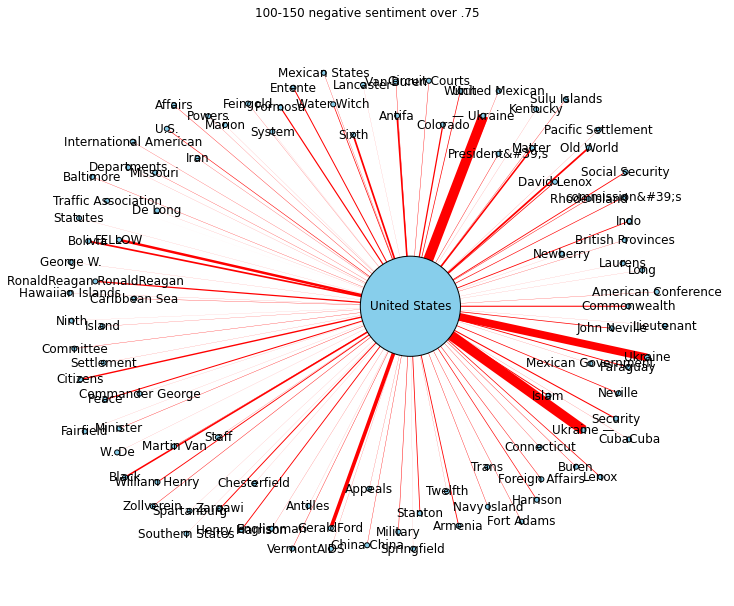

In [18]:
ploting_map(charted.loc[charted['avg_sentiment']<0][:100], "100-150 negative sentiment over .75")

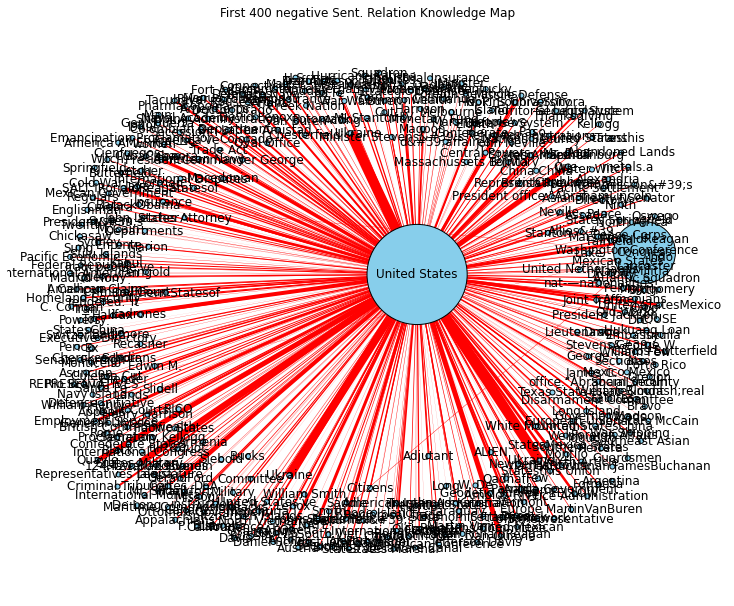

In [19]:
ploting_map(charted.loc[charted['avg_sentiment']<0][:400], "First 400 negative Sent. Relation Knowledge Map")

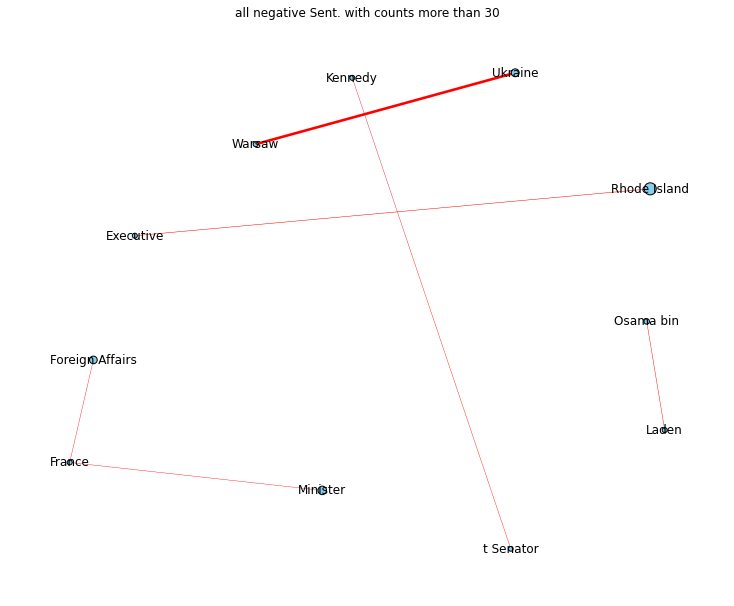

In [20]:
ploting_map(chartoy.loc[chartoy['avg_sentiment']<0], "all negative Sent. with counts more than 30")

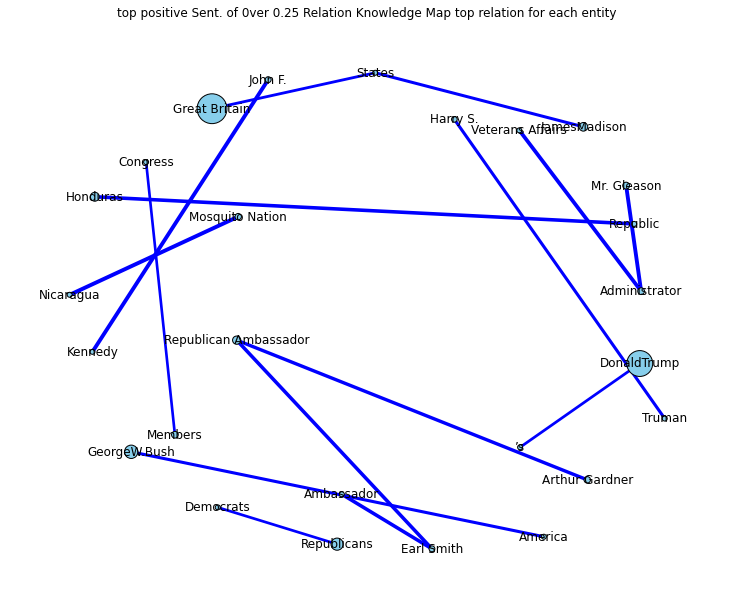

In [21]:
ploting_map(chartoy.loc[chartoy['avg_sentiment']>0.25], "top positive Sent. of 0ver 0.25 Relation Knowledge Map top relation for each entity")

The End